# Proyecto Cencia de DAtos
En este proyecto se analizarán datos del Departamento de Transplantes Hepáticos de la Fundación Santafé

# 0. Importación de librerías

In [71]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 285)

In [72]:
path = "C:\\Users\\jmriv\\OneDrive - Universidad de los andes\\Semestres uniandes\\2025-2\\Ciencia de datos aplicada\\Proyecto transplantes hepáticos Fundación Sanatfé"

# 1. Entendimiento de los datos

## 1.1 Caracterización de los archivos

In [73]:
files = []

for file_name in os.listdir(path):
    if '.xlsx' in file_name:
        files.append(file_name)

In [75]:
for file in files:
    print(file)
    df = pd.read_excel(f'{path}\\{file}')
    print(f'La base de datos tiene {df.shape[1]} columnas y {df.shape[0]} filas.')
    print('--'*20)

Cirugías Hepaticas consolidado.xlsx
La base de datos tiene 276 columnas y 376 filas.
----------------------------------------
Cirugías Pancreaticas Consolidado.xlsx
La base de datos tiene 240 columnas y 764 filas.
----------------------------------------
Colecistectomías Laparoscopicas consolidado.xlsx
La base de datos tiene 10 columnas y 103 filas.
----------------------------------------
Diccionario de datos cirugías hepáticas.xlsx
La base de datos tiene 6 columnas y 275 filas.
----------------------------------------
Otras cirugias consolidado.xlsx
La base de datos tiene 7 columnas y 170 filas.
----------------------------------------
Trasplante hepático consolidado.xlsx
La base de datos tiene 285 columnas y 736 filas.
----------------------------------------


In [76]:
for file in files:
    print(file)
    df = pd.read_excel(f'{path}\\{file}')
    print(df.columns[:20])
    print('--'*20)

Cirugías Hepaticas consolidado.xlsx
Index(['#', 'Año', 'Mes', 'Código anonimización', 'Edad', 'Sexo', 'Fecha_Cx',
       'Fecha_Nacimiento', 'Seguro', 'Síntoma_Principal ',
       'Fecha_Inicio_Síntomas', 'Patología_De_Base', 'Fecha_Dx',
       'Antecente_Cáncer', 'Cuál_Antecedente_ Cáncer',
       'Antecedente_Patológico', 'Antecedente_Patológico_Escrito',
       'Antecedente_Quirúrgico_#1', 'ACE_Preoperatoria',
       'Fecha_ACE_Preoperatoria'],
      dtype='object')
----------------------------------------
Cirugías Pancreaticas Consolidado.xlsx
Index(['#', 'Año', 'Mes', 'Código de anonimización ', 'Edad', 'Sexo',
       'Fecha_Cx', 'Fecha_Nacimiento', 'Seguro', 'Comorbilidades',
       'Antecedente_Médico', 'Tabaquismo', 'Tóxicos', 'Trasfusión_Previa',
       'Cx_Abdominal_Previa', 'Antecedentes_Qx', 'Peso', 'Talla', 'BMI',
       'Grupo_Sanguíneo'],
      dtype='object')
----------------------------------------
Colecistectomías Laparoscopicas consolidado.xlsx
Index(['#', 'Fecha_Cx'

## 1.2 Cirugía hepática consolidada

In [77]:
# Mostraremos una muestra 5 filas al azar
df = pd.read_excel(f'{path}\\{files[0]}',index_col=0)
df.sample(5)

,Año,Mes,Código anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Síntoma_Principal,Fecha_Inicio_Síntomas,Patología_De_Base,Fecha_Dx,Antecente_Cáncer,Cuál_Antecedente_ Cáncer,Antecedente_Patológico,Antecedente_Patológico_Escrito,Antecedente_Quirúrgico_#1,ACE_Preoperatoria,Fecha_ACE_Preoperatoria,Ca19-9_Preoperatorio,Fecha_Ca19-9_Preoperatorio,AFP_Preoperstorio,Fecha_AFP_Preoperatorio,Ca125_Preoperatorio,Fecha_Ca125_Preoperatorio,KRAS_Preoperatorio,TAC_Preoperatorio,Fecha_TAC_Preoperatorio,RNM_Preoperatorio,Fecha_RNM_Preoperatorio,Ecografía_Preoperatoria,Fecha_Ecografía_Preoperatoria,Angiografía_Preoperatoria,Fecha_Angiografía_Preoperatoria,Medicina_Nuclear_Preoperatoria,Fecha_Medicina_Nuclerar_Preoperatoria,PET_Preoperatorio,Fecha_PET_Preopratoria,EKG,Ecocardiograma,Resultado_Electrocardiograma,FEVI,Eco_Stress,Hallazgos_Eco_Stress,Perfusión _Miocárdica,Hallazgo_Perfusión_Miocárdica,Prueba_Esfuerzo,Hallazgo_Prueba_Esfuerzo,PH,PO2,PCO2,HCO3,BE,Espirometría,_Pre_Hepatectomía,Creatinina_Pre_Hepatectomía,Sodio_Pre_Hepatectomía,Potasio_Pre_Hepatectomía,Calcio_Pre_Hepatectomía,Magnesio_Pre_Hepatectomía,ALT_Pre_Hepatectomía,AST_Pre_Hepatectomía,Bilirrubina_Total_Pre_Hepatectomía,Bilirrubina_Directa_Pre_Hepatectomía,Fosfatasa_Alcalina__Pre_Hepatectomía,Albúmina__Pre_Hepatectomía,Glucosa_Pre_Hepatectomía,Hemoglobina__Pre_Hepatectomía,Hematocrito_Pre_Hepatectomía,PlAQUETAS_Pre_Hepatectomía,INR_Pre_Hepatectomía,PTT_Pre_Hepatectomía,Biopsia_Hepátia_Preoperatoria,Tipo_Biopsia_Hepática_Preoperatoria,Fecha_Biopsia_Hepática_Preoperatoria,Tipo_Tumor_Biopsia_Preoperatoria,Grado_Histológico_Tumor_Biopsia_Preoperatoria,Tipo_Tumor_Primario#1,Tipo_Tumor_Primario#2,Tiene_Ca_Colorrectal,Tiene_NET,Metástasis_Distancia,Sitio_de_Metástasis,Metástasis_Hepáticas,Fecha_Metástasis_Hepáticas,Número_Total_Metástasis,Metástasis_Segmento_I,Metástasis_Segmento_II,Metástasis_Segmento_III,Metástasis_Segmento_IV,Metástasis_Segmento_V,Metástasis_Segmento_VI,Metástasis_Segmento_VII,Metástasis_Segmento_VIII,Recibió_Neoadyuvancia,Tipo_Neoadyuvancia,Fecha_Neoadyuvancia,Respuesta_Tumoral,Resección_Tumor_Primario,Fecha_Resección_Tumor_Primario,Tiempo_Hopitalización_Primera_Cx,Complicación_Primera_Cx,Cuál_Complicación,Requirió_UCI,Días_En_UCI,Requirió_Reintervención,Fecha_Reintervención,Quimioterapia_Pre_Hepatectomía,Número_Ciclos_Quimioterapia_Prehepatectomía,Fecha_Inicio_uimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía,Esquema_Quimioterapia_Prehepatectomía,Cambio _de_Esquema_Quimioterapia_Prehepatectomía,Razón_Cambio_Quimioterapia_Prehepatectomía,Fecha_Inicio_Nueva_Quimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía.1,Respuesta_Tumoral_Quimioterapia_Prehepatectomía,Reducción_de_Tamaño_%_Quimioterapia_Prehepatectomía,Radioterapia_Prehepatectomía,Fecha_Inicio_Radioterapia_Prehepatectomía,Fecha_Terminación_Radioterapia_Prehepatectomía,Número_Sesiones_Radioterapia_Prehepatectomía,Dosis_Total_Radioterapia_Prehepatectomía,Quimioembolización,Fecha_Inicio-Quimioembolización,Fecha_Terminación_Quimioembolización,Radioablación,Fecha_Radioablación,Sesiones_Radioablación,Cirujano_Principal,Curujano_Ayudante,Tipo_Hepatectomia,Otro_Procedimiento_Realizado_en_la_Hepatectomía,Laparoscópica,Conversión_a_Abierta,Radioablación_Intraoperatoria,Segmentos_Intervenidos,Tiempo_Operatorio,Ecografía_Intraoperatoria,Hallzagoz_Ecografía_Intraoperatoria,Relación_Vacular_Ecografía,Tiempo_Corte_Parénquima,Control_Vascular,Glóbulos_Rojos_Empaquetados,Plasma,Crioprecipitados,Plaquetas,Coloides,Complicación_Intraoperatoria,Cuál_Complicación_Intraoperatoria,Antibiótico_Profiláctico,Días_Antibiótico_Profiláctico,Profilaxis_Antitrombótica,Días_Hospitalización_Hepatectomía,UCI_Posthepatectomía,Días_UCI_Posthepatectomía,Día_Retiro_Dren,Complicación_Posthepatectomía,Complicación_Posthepatectomía-Escrita,Reintervención,Reintervención_Causa,Complicación_Trdía,Histología_Hepatectomía,Grado_Histológico,Grado_Histológico.1,T,N,M,Estadio,Tamaño,T

In [78]:
# Se listarán los valores únicos de cada columna para identificar posibles valores atípicos

for col in df.columns:
    print(col)
    print(df[col].unique())
    print('--'*10)

Año
[2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013.
 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022. 2023. 2024. 2025.
   nan 1900.]
--------------------
Mes
[ 6. 10. 11. 12.  1.  3.  4.  5.  9.  2.  7.  8. nan]
--------------------
Código anonimización
['HEP001' 'HEP002' 'HEP003' 'HEP004' 'HEP005' 'HEP006' 'HEP007' 'HEP008'
 'HEP009' 'HEP010' 'HEP011' 'HEP012' 'HEP013' 'HEP014' 'HEP015' 'HEP016'
 'HEP017' 'HEP018' 'HEP019' 'HEP020' 'HEP021' 'HEP022' 'HEP023' 'HEP024'
 'HEP025' 'HEP026' 'HEP027' 'HEP028' 'HEP029' 'HEP030' 'HEP031' 'HEP032'
 'HEP033' 'HEP034' 'HEP035' 'HEP036' 'HEP037' 'HEP038' 'HEP039' 'HEP040'
 'HEP041' 'HEP042' 'HEP043' 'HEP044' 'HEP045' 'HEP046' 'HEP047' 'HEP048'
 'HEP049' 'HEP050' 'HEP051' 'HEP052' 'HEP053' 'HEP054' 'HEP055' 'HEP056'
 'HEP057' 'HEP058' 'HEP059' 'HEP060' 'HEP061' 'HEP062' 'HEP063' 'HEP064'
 'HEP065' 'HEP066' 'HEP067' 'HEP068' 'HEP069' 'HEP070' 'HEP071' 'HEP072'
 'HEP073' 'HEP074' 'HEP075' 'HEP076' 'HEP077' 'HEP078' 'HE

# 2. Análisis de calidad y preparación de datos 

## 2.1 Datos del paciente

In [79]:
for col in df.columns:
    print(col)
    print(df[col].isnull().sum())
    print('--'*10)

Año
4
--------------------
Mes
11
--------------------
Código anonimización
0
--------------------
Edad
29
--------------------
Sexo
29
--------------------
Fecha_Cx
34
--------------------
Fecha_Nacimiento
36
--------------------
Seguro
50
--------------------
Síntoma_Principal 
111
--------------------
Fecha_Inicio_Síntomas
111
--------------------
Patología_De_Base
55
--------------------
Fecha_Dx
113
--------------------
Antecente_Cáncer
79
--------------------
Cuál_Antecedente_ Cáncer
79
--------------------
Antecedente_Patológico
118
--------------------
Antecedente_Patológico_Escrito
195
--------------------
Antecedente_Quirúrgico_#1
115
--------------------
ACE_Preoperatoria
110
--------------------
Fecha_ACE_Preoperatoria
111
--------------------
Ca19-9_Preoperatorio
110
--------------------
Fecha_Ca19-9_Preoperatorio
111
--------------------
AFP_Preoperstorio
113
--------------------
Fecha_AFP_Preoperatorio
112
--------------------
Ca125_Preoperatorio
110
--------------------

In [80]:
def parse_date(date, valores_nulos=[]):
    if pd.isna(date) or date in valores_nulos:
        return pd.NaT
    try:
        if isinstance(date, int):
            return pd.to_datetime(date, origin="1899-12-30", unit="D", errors='coerce')
        else:
            return pd.to_datetime(date, dayfirst=True, errors='coerce')
    except:
        return pd.NaT

### 2.1.1 Año
Viendo que las filas donde el año es nulo están vacías, se eliminarán para el análisis.

Asimismo, las filas donde el año es 1900 tienen el resto de datos vacíos, por lo que se eliminarán del análisis.

In [81]:
df[df['Año'].isnull()]

,Año,Mes,Código anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Síntoma_Principal,Fecha_Inicio_Síntomas,Patología_De_Base,Fecha_Dx,Antecente_Cáncer,Cuál_Antecedente_ Cáncer,Antecedente_Patológico,Antecedente_Patológico_Escrito,Antecedente_Quirúrgico_#1,ACE_Preoperatoria,Fecha_ACE_Preoperatoria,Ca19-9_Preoperatorio,Fecha_Ca19-9_Preoperatorio,AFP_Preoperstorio,Fecha_AFP_Preoperatorio,Ca125_Preoperatorio,Fecha_Ca125_Preoperatorio,KRAS_Preoperatorio,TAC_Preoperatorio,Fecha_TAC_Preoperatorio,RNM_Preoperatorio,Fecha_RNM_Preoperatorio,Ecografía_Preoperatoria,Fecha_Ecografía_Preoperatoria,Angiografía_Preoperatoria,Fecha_Angiografía_Preoperatoria,Medicina_Nuclear_Preoperatoria,Fecha_Medicina_Nuclerar_Preoperatoria,PET_Preoperatorio,Fecha_PET_Preopratoria,EKG,Ecocardiograma,Resultado_Electrocardiograma,FEVI,Eco_Stress,Hallazgos_Eco_Stress,Perfusión _Miocárdica,Hallazgo_Perfusión_Miocárdica,Prueba_Esfuerzo,Hallazgo_Prueba_Esfuerzo,PH,PO2,PCO2,HCO3,BE,Espirometría,_Pre_Hepatectomía,Creatinina_Pre_Hepatectomía,Sodio_Pre_Hepatectomía,Potasio_Pre_Hepatectomía,Calcio_Pre_Hepatectomía,Magnesio_Pre_Hepatectomía,ALT_Pre_Hepatectomía,AST_Pre_Hepatectomía,Bilirrubina_Total_Pre_Hepatectomía,Bilirrubina_Directa_Pre_Hepatectomía,Fosfatasa_Alcalina__Pre_Hepatectomía,Albúmina__Pre_Hepatectomía,Glucosa_Pre_Hepatectomía,Hemoglobina__Pre_Hepatectomía,Hematocrito_Pre_Hepatectomía,PlAQUETAS_Pre_Hepatectomía,INR_Pre_Hepatectomía,PTT_Pre_Hepatectomía,Biopsia_Hepátia_Preoperatoria,Tipo_Biopsia_Hepática_Preoperatoria,Fecha_Biopsia_Hepática_Preoperatoria,Tipo_Tumor_Biopsia_Preoperatoria,Grado_Histológico_Tumor_Biopsia_Preoperatoria,Tipo_Tumor_Primario#1,Tipo_Tumor_Primario#2,Tiene_Ca_Colorrectal,Tiene_NET,Metástasis_Distancia,Sitio_de_Metástasis,Metástasis_Hepáticas,Fecha_Metástasis_Hepáticas,Número_Total_Metástasis,Metástasis_Segmento_I,Metástasis_Segmento_II,Metástasis_Segmento_III,Metástasis_Segmento_IV,Metástasis_Segmento_V,Metástasis_Segmento_VI,Metástasis_Segmento_VII,Metástasis_Segmento_VIII,Recibió_Neoadyuvancia,Tipo_Neoadyuvancia,Fecha_Neoadyuvancia,Respuesta_Tumoral,Resección_Tumor_Primario,Fecha_Resección_Tumor_Primario,Tiempo_Hopitalización_Primera_Cx,Complicación_Primera_Cx,Cuál_Complicación,Requirió_UCI,Días_En_UCI,Requirió_Reintervención,Fecha_Reintervención,Quimioterapia_Pre_Hepatectomía,Número_Ciclos_Quimioterapia_Prehepatectomía,Fecha_Inicio_uimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía,Esquema_Quimioterapia_Prehepatectomía,Cambio _de_Esquema_Quimioterapia_Prehepatectomía,Razón_Cambio_Quimioterapia_Prehepatectomía,Fecha_Inicio_Nueva_Quimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía.1,Respuesta_Tumoral_Quimioterapia_Prehepatectomía,Reducción_de_Tamaño_%_Quimioterapia_Prehepatectomía,Radioterapia_Prehepatectomía,Fecha_Inicio_Radioterapia_Prehepatectomía,Fecha_Terminación_Radioterapia_Prehepatectomía,Número_Sesiones_Radioterapia_Prehepatectomía,Dosis_Total_Radioterapia_Prehepatectomía,Quimioembolización,Fecha_Inicio-Quimioembolización,Fecha_Terminación_Quimioembolización,Radioablación,Fecha_Radioablación,Sesiones_Radioablación,Cirujano_Principal,Curujano_Ayudante,Tipo_Hepatectomia,Otro_Procedimiento_Realizado_en_la_Hepatectomía,Laparoscópica,Conversión_a_Abierta,Radioablación_Intraoperatoria,Segmentos_Intervenidos,Tiempo_Operatorio,Ecografía_Intraoperatoria,Hallzagoz_Ecografía_Intraoperatoria,Relación_Vacular_Ecografía,Tiempo_Corte_Parénquima,Control_Vascular,Glóbulos_Rojos_Empaquetados,Plasma,Crioprecipitados,Plaquetas,Coloides,Complicación_Intraoperatoria,Cuál_Complicación_Intraoperatoria,Antibiótico_Profiláctico,Días_Antibiótico_Profiláctico,Profilaxis_Antitrombótica,Días_Hospitalización_Hepatectomía,UCI_Posthepatectomía,Días_UCI_Posthepatectomía,Día_Retiro_Dren,Complicación_Posthepatectomía,Complicación_Posthepatectomía-Escrita,Reintervención,Reintervención_Causa,Complicación_Trdía,Histología_Hepatectomía,Grado_Histológico,Grado_Histológico.1,T,N,M,Estadio,Tamaño,T

In [82]:
df_clean = df.dropna(subset = ['Año'])

In [83]:
print(df_clean['Año'].describe())
print('--'*10)
print(df_clean['Año'].unique())

count     372.000000
mean     2007.491935
std        28.863793
min      1900.000000
25%      2009.000000
50%      2014.000000
75%      2020.000000
max      2025.000000
Name: Año, dtype: float64
--------------------
[2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013.
 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022. 2023. 2024. 2025.
 1900.]


In [84]:
df_clean[df_clean['Año'] == 1900]

,Año,Mes,Código anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Síntoma_Principal,Fecha_Inicio_Síntomas,Patología_De_Base,Fecha_Dx,Antecente_Cáncer,Cuál_Antecedente_ Cáncer,Antecedente_Patológico,Antecedente_Patológico_Escrito,Antecedente_Quirúrgico_#1,ACE_Preoperatoria,Fecha_ACE_Preoperatoria,Ca19-9_Preoperatorio,Fecha_Ca19-9_Preoperatorio,AFP_Preoperstorio,Fecha_AFP_Preoperatorio,Ca125_Preoperatorio,Fecha_Ca125_Preoperatorio,KRAS_Preoperatorio,TAC_Preoperatorio,Fecha_TAC_Preoperatorio,RNM_Preoperatorio,Fecha_RNM_Preoperatorio,Ecografía_Preoperatoria,Fecha_Ecografía_Preoperatoria,Angiografía_Preoperatoria,Fecha_Angiografía_Preoperatoria,Medicina_Nuclear_Preoperatoria,Fecha_Medicina_Nuclerar_Preoperatoria,PET_Preoperatorio,Fecha_PET_Preopratoria,EKG,Ecocardiograma,Resultado_Electrocardiograma,FEVI,Eco_Stress,Hallazgos_Eco_Stress,Perfusión _Miocárdica,Hallazgo_Perfusión_Miocárdica,Prueba_Esfuerzo,Hallazgo_Prueba_Esfuerzo,PH,PO2,PCO2,HCO3,BE,Espirometría,_Pre_Hepatectomía,Creatinina_Pre_Hepatectomía,Sodio_Pre_Hepatectomía,Potasio_Pre_Hepatectomía,Calcio_Pre_Hepatectomía,Magnesio_Pre_Hepatectomía,ALT_Pre_Hepatectomía,AST_Pre_Hepatectomía,Bilirrubina_Total_Pre_Hepatectomía,Bilirrubina_Directa_Pre_Hepatectomía,Fosfatasa_Alcalina__Pre_Hepatectomía,Albúmina__Pre_Hepatectomía,Glucosa_Pre_Hepatectomía,Hemoglobina__Pre_Hepatectomía,Hematocrito_Pre_Hepatectomía,PlAQUETAS_Pre_Hepatectomía,INR_Pre_Hepatectomía,PTT_Pre_Hepatectomía,Biopsia_Hepátia_Preoperatoria,Tipo_Biopsia_Hepática_Preoperatoria,Fecha_Biopsia_Hepática_Preoperatoria,Tipo_Tumor_Biopsia_Preoperatoria,Grado_Histológico_Tumor_Biopsia_Preoperatoria,Tipo_Tumor_Primario#1,Tipo_Tumor_Primario#2,Tiene_Ca_Colorrectal,Tiene_NET,Metástasis_Distancia,Sitio_de_Metástasis,Metástasis_Hepáticas,Fecha_Metástasis_Hepáticas,Número_Total_Metástasis,Metástasis_Segmento_I,Metástasis_Segmento_II,Metástasis_Segmento_III,Metástasis_Segmento_IV,Metástasis_Segmento_V,Metástasis_Segmento_VI,Metástasis_Segmento_VII,Metástasis_Segmento_VIII,Recibió_Neoadyuvancia,Tipo_Neoadyuvancia,Fecha_Neoadyuvancia,Respuesta_Tumoral,Resección_Tumor_Primario,Fecha_Resección_Tumor_Primario,Tiempo_Hopitalización_Primera_Cx,Complicación_Primera_Cx,Cuál_Complicación,Requirió_UCI,Días_En_UCI,Requirió_Reintervención,Fecha_Reintervención,Quimioterapia_Pre_Hepatectomía,Número_Ciclos_Quimioterapia_Prehepatectomía,Fecha_Inicio_uimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía,Esquema_Quimioterapia_Prehepatectomía,Cambio _de_Esquema_Quimioterapia_Prehepatectomía,Razón_Cambio_Quimioterapia_Prehepatectomía,Fecha_Inicio_Nueva_Quimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía.1,Respuesta_Tumoral_Quimioterapia_Prehepatectomía,Reducción_de_Tamaño_%_Quimioterapia_Prehepatectomía,Radioterapia_Prehepatectomía,Fecha_Inicio_Radioterapia_Prehepatectomía,Fecha_Terminación_Radioterapia_Prehepatectomía,Número_Sesiones_Radioterapia_Prehepatectomía,Dosis_Total_Radioterapia_Prehepatectomía,Quimioembolización,Fecha_Inicio-Quimioembolización,Fecha_Terminación_Quimioembolización,Radioablación,Fecha_Radioablación,Sesiones_Radioablación,Cirujano_Principal,Curujano_Ayudante,Tipo_Hepatectomia,Otro_Procedimiento_Realizado_en_la_Hepatectomía,Laparoscópica,Conversión_a_Abierta,Radioablación_Intraoperatoria,Segmentos_Intervenidos,Tiempo_Operatorio,Ecografía_Intraoperatoria,Hallzagoz_Ecografía_Intraoperatoria,Relación_Vacular_Ecografía,Tiempo_Corte_Parénquima,Control_Vascular,Glóbulos_Rojos_Empaquetados,Plasma,Crioprecipitados,Plaquetas,Coloides,Complicación_Intraoperatoria,Cuál_Complicación_Intraoperatoria,Antibiótico_Profiláctico,Días_Antibiótico_Profiláctico,Profilaxis_Antitrombótica,Días_Hospitalización_Hepatectomía,UCI_Posthepatectomía,Días_UCI_Posthepatectomía,Día_Retiro_Dren,Complicación_Posthepatectomía,Complicación_Posthepatectomía-Escrita,Reintervención,Reintervención_Causa,Complicación_Trdía,Histología_Hepatectomía,Grado_Histológico,Grado_Histológico.1,T,N,M,Estadio,Tamaño,T

In [85]:
# Condition:
# - year and month must NOT be NaN
# - all other columns must be NaN
mask = (
    df["Año"].notna()
    & df["Mes"].notna()
    & df["Código anonimización"].notna()
    & df.drop(columns=["Año", "Mes", "Código anonimización"]).isna().all(axis=1)
)

# Get rows that match
rows = df[mask]
print(rows['Año'])


#
354    1900.0
355    1900.0
356    1900.0
357    1900.0
358    1900.0
359    1900.0
360    1900.0
361    1900.0
362    1900.0
363    1900.0
364    1900.0
365    1900.0
366    1900.0
367    1900.0
368    1900.0
369    1900.0
370    1900.0
371    1900.0
372    1900.0
373    1900.0
374    1900.0
375    1900.0
376    1900.0
377    1900.0
Name: Año, dtype: float64


In [86]:
df_clean = df_clean[df_clean['Año'] != 1900]

In [87]:
print(df_clean['Año'].describe())
print('--'*10)
print(df_clean['Año'].unique())

count     348.000000
mean     2014.905172
std         6.038749
min      2002.000000
25%      2010.000000
50%      2015.000000
75%      2021.000000
max      2025.000000
Name: Año, dtype: float64
--------------------
[2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013.
 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021. 2022. 2023. 2024. 2025.]


<Axes: >

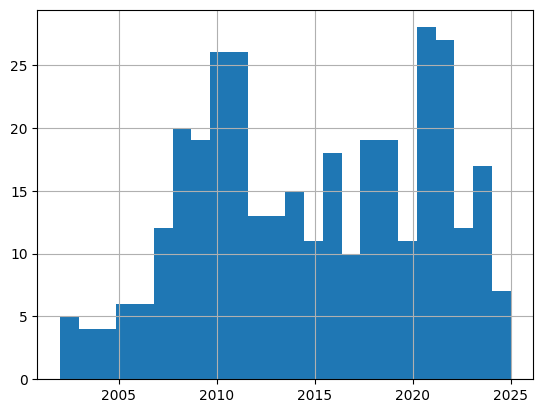

In [88]:
df_clean['Año'].hist(bins=24)

### 2.1.2 Mes
Pacientes HEP342 a HEP 348 solo tienen edad y sexo, pero el mes está vacío.

In [89]:
print(df_clean['Mes'].describe())
print('--'*10)
print(df_clean['Mes'].unique())

count    341.000000
mean       6.381232
std        3.406067
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Mes, dtype: float64
--------------------
[ 6. 10. 11. 12.  1.  3.  4.  5.  9.  2.  7.  8. nan]


In [90]:
df_clean[df_clean['Mes'].isnull()]

,Año,Mes,Código anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Síntoma_Principal,Fecha_Inicio_Síntomas,Patología_De_Base,Fecha_Dx,Antecente_Cáncer,Cuál_Antecedente_ Cáncer,Antecedente_Patológico,Antecedente_Patológico_Escrito,Antecedente_Quirúrgico_#1,ACE_Preoperatoria,Fecha_ACE_Preoperatoria,Ca19-9_Preoperatorio,Fecha_Ca19-9_Preoperatorio,AFP_Preoperstorio,Fecha_AFP_Preoperatorio,Ca125_Preoperatorio,Fecha_Ca125_Preoperatorio,KRAS_Preoperatorio,TAC_Preoperatorio,Fecha_TAC_Preoperatorio,RNM_Preoperatorio,Fecha_RNM_Preoperatorio,Ecografía_Preoperatoria,Fecha_Ecografía_Preoperatoria,Angiografía_Preoperatoria,Fecha_Angiografía_Preoperatoria,Medicina_Nuclear_Preoperatoria,Fecha_Medicina_Nuclerar_Preoperatoria,PET_Preoperatorio,Fecha_PET_Preopratoria,EKG,Ecocardiograma,Resultado_Electrocardiograma,FEVI,Eco_Stress,Hallazgos_Eco_Stress,Perfusión _Miocárdica,Hallazgo_Perfusión_Miocárdica,Prueba_Esfuerzo,Hallazgo_Prueba_Esfuerzo,PH,PO2,PCO2,HCO3,BE,Espirometría,_Pre_Hepatectomía,Creatinina_Pre_Hepatectomía,Sodio_Pre_Hepatectomía,Potasio_Pre_Hepatectomía,Calcio_Pre_Hepatectomía,Magnesio_Pre_Hepatectomía,ALT_Pre_Hepatectomía,AST_Pre_Hepatectomía,Bilirrubina_Total_Pre_Hepatectomía,Bilirrubina_Directa_Pre_Hepatectomía,Fosfatasa_Alcalina__Pre_Hepatectomía,Albúmina__Pre_Hepatectomía,Glucosa_Pre_Hepatectomía,Hemoglobina__Pre_Hepatectomía,Hematocrito_Pre_Hepatectomía,PlAQUETAS_Pre_Hepatectomía,INR_Pre_Hepatectomía,PTT_Pre_Hepatectomía,Biopsia_Hepátia_Preoperatoria,Tipo_Biopsia_Hepática_Preoperatoria,Fecha_Biopsia_Hepática_Preoperatoria,Tipo_Tumor_Biopsia_Preoperatoria,Grado_Histológico_Tumor_Biopsia_Preoperatoria,Tipo_Tumor_Primario#1,Tipo_Tumor_Primario#2,Tiene_Ca_Colorrectal,Tiene_NET,Metástasis_Distancia,Sitio_de_Metástasis,Metástasis_Hepáticas,Fecha_Metástasis_Hepáticas,Número_Total_Metástasis,Metástasis_Segmento_I,Metástasis_Segmento_II,Metástasis_Segmento_III,Metástasis_Segmento_IV,Metástasis_Segmento_V,Metástasis_Segmento_VI,Metástasis_Segmento_VII,Metástasis_Segmento_VIII,Recibió_Neoadyuvancia,Tipo_Neoadyuvancia,Fecha_Neoadyuvancia,Respuesta_Tumoral,Resección_Tumor_Primario,Fecha_Resección_Tumor_Primario,Tiempo_Hopitalización_Primera_Cx,Complicación_Primera_Cx,Cuál_Complicación,Requirió_UCI,Días_En_UCI,Requirió_Reintervención,Fecha_Reintervención,Quimioterapia_Pre_Hepatectomía,Número_Ciclos_Quimioterapia_Prehepatectomía,Fecha_Inicio_uimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía,Esquema_Quimioterapia_Prehepatectomía,Cambio _de_Esquema_Quimioterapia_Prehepatectomía,Razón_Cambio_Quimioterapia_Prehepatectomía,Fecha_Inicio_Nueva_Quimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía.1,Respuesta_Tumoral_Quimioterapia_Prehepatectomía,Reducción_de_Tamaño_%_Quimioterapia_Prehepatectomía,Radioterapia_Prehepatectomía,Fecha_Inicio_Radioterapia_Prehepatectomía,Fecha_Terminación_Radioterapia_Prehepatectomía,Número_Sesiones_Radioterapia_Prehepatectomía,Dosis_Total_Radioterapia_Prehepatectomía,Quimioembolización,Fecha_Inicio-Quimioembolización,Fecha_Terminación_Quimioembolización,Radioablación,Fecha_Radioablación,Sesiones_Radioablación,Cirujano_Principal,Curujano_Ayudante,Tipo_Hepatectomia,Otro_Procedimiento_Realizado_en_la_Hepatectomía,Laparoscópica,Conversión_a_Abierta,Radioablación_Intraoperatoria,Segmentos_Intervenidos,Tiempo_Operatorio,Ecografía_Intraoperatoria,Hallzagoz_Ecografía_Intraoperatoria,Relación_Vacular_Ecografía,Tiempo_Corte_Parénquima,Control_Vascular,Glóbulos_Rojos_Empaquetados,Plasma,Crioprecipitados,Plaquetas,Coloides,Complicación_Intraoperatoria,Cuál_Complicación_Intraoperatoria,Antibiótico_Profiláctico,Días_Antibiótico_Profiláctico,Profilaxis_Antitrombótica,Días_Hospitalización_Hepatectomía,UCI_Posthepatectomía,Días_UCI_Posthepatectomía,Día_Retiro_Dren,Complicación_Posthepatectomía,Complicación_Posthepatectomía-Escrita,Reintervención,Reintervención_Causa,Complicación_Trdía,Histología_Hepatectomía,Grado_Histológico,Grado_Histológico.1,T,N,M,Estadio,Tamaño,T

<Axes: >

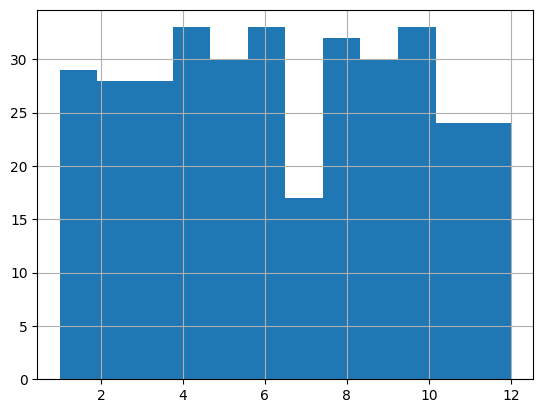

In [91]:
df_clean['Mes'].hist(bins=12)

### 2.1.3 Código anonimización
Código generado con aumento automático

In [92]:
print(df_clean['Código anonimización'].describe())
print('--'*10)
print(df_clean['Código anonimización'].unique())

count        348
unique       348
top       HEP348
freq           1
Name: Código anonimización, dtype: object
--------------------
['HEP001' 'HEP002' 'HEP003' 'HEP004' 'HEP005' 'HEP006' 'HEP007' 'HEP008'
 'HEP009' 'HEP010' 'HEP011' 'HEP012' 'HEP013' 'HEP014' 'HEP015' 'HEP016'
 'HEP017' 'HEP018' 'HEP019' 'HEP020' 'HEP021' 'HEP022' 'HEP023' 'HEP024'
 'HEP025' 'HEP026' 'HEP027' 'HEP028' 'HEP029' 'HEP030' 'HEP031' 'HEP032'
 'HEP033' 'HEP034' 'HEP035' 'HEP036' 'HEP037' 'HEP038' 'HEP039' 'HEP040'
 'HEP041' 'HEP042' 'HEP043' 'HEP044' 'HEP045' 'HEP046' 'HEP047' 'HEP048'
 'HEP049' 'HEP050' 'HEP051' 'HEP052' 'HEP053' 'HEP054' 'HEP055' 'HEP056'
 'HEP057' 'HEP058' 'HEP059' 'HEP060' 'HEP061' 'HEP062' 'HEP063' 'HEP064'
 'HEP065' 'HEP066' 'HEP067' 'HEP068' 'HEP069' 'HEP070' 'HEP071' 'HEP072'
 'HEP073' 'HEP074' 'HEP075' 'HEP076' 'HEP077' 'HEP078' 'HEP079' 'HEP080'
 'HEP081' 'HEP082' 'HEP083' 'HEP084' 'HEP085' 'HEP086' 'HEP087' 'HEP088'
 'HEP089' 'HEP090' 'HEP091' 'HEP092' 'HEP093' 'HEP094' 'HEP095' 'H

### 2.1.4 Edad
HEP327 no tiene edad.

Hay dos entradas con valores bajos (3 y 13.27 años)

In [93]:
print(df_clean['Edad'].describe())
print('--'*10)
print(df_clean['Edad'].unique())

count    347.000000
mean      58.226750
std       15.126251
min        3.000000
25%       48.342466
50%       61.819178
75%       69.928767
max       93.109589
Name: Edad, dtype: float64
--------------------
[28.69041096 73.51232877 72.62465753 52.98630137 52.47123288 54.92328767
 48.72328767 61.45205479 40.4109589  71.66027397 46.00821918 68.82739726
 41.85753425 54.0630137  72.7890411  71.32054795 45.77534247 75.72054795
 45.41643836 58.85479452 57.6630137  57.19452055 56.59178082 22.89863014
 56.78082192 18.96438356 74.94794521 46.47123288 61.6109589  68.76712329
 53.37534247 54.05205479 39.72054795 64.9890411  79.18356164 56.49589041
 60.3890411  61.81917808 61.90136986 54.37808219 45.85479452 76.00547945
 71.23013699 50.96164384 75.87945205 71.32328767 56.81643836 44.30410959
 39.71780822 74.44657534 74.55616438 51.96986301 72.27123288 22.98082192
 66.73424658 64.37534247 72.21917808 55.0109589  62.85205479 64.89863014
 71.77534247 80.61369863 43.92328767 61.99452055 43.97534247 6

In [94]:
df_clean[df_clean['Edad'].isnull()]

,Año,Mes,Código anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Síntoma_Principal,Fecha_Inicio_Síntomas,Patología_De_Base,Fecha_Dx,Antecente_Cáncer,Cuál_Antecedente_ Cáncer,Antecedente_Patológico,Antecedente_Patológico_Escrito,Antecedente_Quirúrgico_#1,ACE_Preoperatoria,Fecha_ACE_Preoperatoria,Ca19-9_Preoperatorio,Fecha_Ca19-9_Preoperatorio,AFP_Preoperstorio,Fecha_AFP_Preoperatorio,Ca125_Preoperatorio,Fecha_Ca125_Preoperatorio,KRAS_Preoperatorio,TAC_Preoperatorio,Fecha_TAC_Preoperatorio,RNM_Preoperatorio,Fecha_RNM_Preoperatorio,Ecografía_Preoperatoria,Fecha_Ecografía_Preoperatoria,Angiografía_Preoperatoria,Fecha_Angiografía_Preoperatoria,Medicina_Nuclear_Preoperatoria,Fecha_Medicina_Nuclerar_Preoperatoria,PET_Preoperatorio,Fecha_PET_Preopratoria,EKG,Ecocardiograma,Resultado_Electrocardiograma,FEVI,Eco_Stress,Hallazgos_Eco_Stress,Perfusión _Miocárdica,Hallazgo_Perfusión_Miocárdica,Prueba_Esfuerzo,Hallazgo_Prueba_Esfuerzo,PH,PO2,PCO2,HCO3,BE,Espirometría,_Pre_Hepatectomía,Creatinina_Pre_Hepatectomía,Sodio_Pre_Hepatectomía,Potasio_Pre_Hepatectomía,Calcio_Pre_Hepatectomía,Magnesio_Pre_Hepatectomía,ALT_Pre_Hepatectomía,AST_Pre_Hepatectomía,Bilirrubina_Total_Pre_Hepatectomía,Bilirrubina_Directa_Pre_Hepatectomía,Fosfatasa_Alcalina__Pre_Hepatectomía,Albúmina__Pre_Hepatectomía,Glucosa_Pre_Hepatectomía,Hemoglobina__Pre_Hepatectomía,Hematocrito_Pre_Hepatectomía,PlAQUETAS_Pre_Hepatectomía,INR_Pre_Hepatectomía,PTT_Pre_Hepatectomía,Biopsia_Hepátia_Preoperatoria,Tipo_Biopsia_Hepática_Preoperatoria,Fecha_Biopsia_Hepática_Preoperatoria,Tipo_Tumor_Biopsia_Preoperatoria,Grado_Histológico_Tumor_Biopsia_Preoperatoria,Tipo_Tumor_Primario#1,Tipo_Tumor_Primario#2,Tiene_Ca_Colorrectal,Tiene_NET,Metástasis_Distancia,Sitio_de_Metástasis,Metástasis_Hepáticas,Fecha_Metástasis_Hepáticas,Número_Total_Metástasis,Metástasis_Segmento_I,Metástasis_Segmento_II,Metástasis_Segmento_III,Metástasis_Segmento_IV,Metástasis_Segmento_V,Metástasis_Segmento_VI,Metástasis_Segmento_VII,Metástasis_Segmento_VIII,Recibió_Neoadyuvancia,Tipo_Neoadyuvancia,Fecha_Neoadyuvancia,Respuesta_Tumoral,Resección_Tumor_Primario,Fecha_Resección_Tumor_Primario,Tiempo_Hopitalización_Primera_Cx,Complicación_Primera_Cx,Cuál_Complicación,Requirió_UCI,Días_En_UCI,Requirió_Reintervención,Fecha_Reintervención,Quimioterapia_Pre_Hepatectomía,Número_Ciclos_Quimioterapia_Prehepatectomía,Fecha_Inicio_uimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía,Esquema_Quimioterapia_Prehepatectomía,Cambio _de_Esquema_Quimioterapia_Prehepatectomía,Razón_Cambio_Quimioterapia_Prehepatectomía,Fecha_Inicio_Nueva_Quimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía.1,Respuesta_Tumoral_Quimioterapia_Prehepatectomía,Reducción_de_Tamaño_%_Quimioterapia_Prehepatectomía,Radioterapia_Prehepatectomía,Fecha_Inicio_Radioterapia_Prehepatectomía,Fecha_Terminación_Radioterapia_Prehepatectomía,Número_Sesiones_Radioterapia_Prehepatectomía,Dosis_Total_Radioterapia_Prehepatectomía,Quimioembolización,Fecha_Inicio-Quimioembolización,Fecha_Terminación_Quimioembolización,Radioablación,Fecha_Radioablación,Sesiones_Radioablación,Cirujano_Principal,Curujano_Ayudante,Tipo_Hepatectomia,Otro_Procedimiento_Realizado_en_la_Hepatectomía,Laparoscópica,Conversión_a_Abierta,Radioablación_Intraoperatoria,Segmentos_Intervenidos,Tiempo_Operatorio,Ecografía_Intraoperatoria,Hallzagoz_Ecografía_Intraoperatoria,Relación_Vacular_Ecografía,Tiempo_Corte_Parénquima,Control_Vascular,Glóbulos_Rojos_Empaquetados,Plasma,Crioprecipitados,Plaquetas,Coloides,Complicación_Intraoperatoria,Cuál_Complicación_Intraoperatoria,Antibiótico_Profiláctico,Días_Antibiótico_Profiláctico,Profilaxis_Antitrombótica,Días_Hospitalización_Hepatectomía,UCI_Posthepatectomía,Días_UCI_Posthepatectomía,Día_Retiro_Dren,Complicación_Posthepatectomía,Complicación_Posthepatectomía-Escrita,Reintervención,Reintervención_Causa,Complicación_Trdía,Histología_Hepatectomía,Grado_Histológico,Grado_Histológico.1,T,N,M,Estadio,Tamaño,T

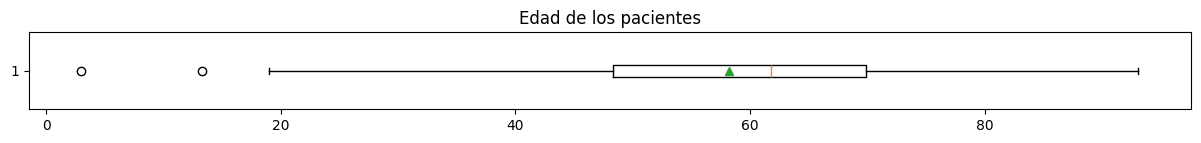

In [95]:
# Plotting distribution but using a boxplot
plt.figure(figsize=(15, 1))
plt.boxplot(df_clean['Edad'].dropna(), showmeans=True, vert=False)
plt.title('Edad de los pacientes')
plt.show()

In [96]:
df_clean[df_clean['Edad'] < 18]

,Año,Mes,Código anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Síntoma_Principal,Fecha_Inicio_Síntomas,Patología_De_Base,Fecha_Dx,Antecente_Cáncer,Cuál_Antecedente_ Cáncer,Antecedente_Patológico,Antecedente_Patológico_Escrito,Antecedente_Quirúrgico_#1,ACE_Preoperatoria,Fecha_ACE_Preoperatoria,Ca19-9_Preoperatorio,Fecha_Ca19-9_Preoperatorio,AFP_Preoperstorio,Fecha_AFP_Preoperatorio,Ca125_Preoperatorio,Fecha_Ca125_Preoperatorio,KRAS_Preoperatorio,TAC_Preoperatorio,Fecha_TAC_Preoperatorio,RNM_Preoperatorio,Fecha_RNM_Preoperatorio,Ecografía_Preoperatoria,Fecha_Ecografía_Preoperatoria,Angiografía_Preoperatoria,Fecha_Angiografía_Preoperatoria,Medicina_Nuclear_Preoperatoria,Fecha_Medicina_Nuclerar_Preoperatoria,PET_Preoperatorio,Fecha_PET_Preopratoria,EKG,Ecocardiograma,Resultado_Electrocardiograma,FEVI,Eco_Stress,Hallazgos_Eco_Stress,Perfusión _Miocárdica,Hallazgo_Perfusión_Miocárdica,Prueba_Esfuerzo,Hallazgo_Prueba_Esfuerzo,PH,PO2,PCO2,HCO3,BE,Espirometría,_Pre_Hepatectomía,Creatinina_Pre_Hepatectomía,Sodio_Pre_Hepatectomía,Potasio_Pre_Hepatectomía,Calcio_Pre_Hepatectomía,Magnesio_Pre_Hepatectomía,ALT_Pre_Hepatectomía,AST_Pre_Hepatectomía,Bilirrubina_Total_Pre_Hepatectomía,Bilirrubina_Directa_Pre_Hepatectomía,Fosfatasa_Alcalina__Pre_Hepatectomía,Albúmina__Pre_Hepatectomía,Glucosa_Pre_Hepatectomía,Hemoglobina__Pre_Hepatectomía,Hematocrito_Pre_Hepatectomía,PlAQUETAS_Pre_Hepatectomía,INR_Pre_Hepatectomía,PTT_Pre_Hepatectomía,Biopsia_Hepátia_Preoperatoria,Tipo_Biopsia_Hepática_Preoperatoria,Fecha_Biopsia_Hepática_Preoperatoria,Tipo_Tumor_Biopsia_Preoperatoria,Grado_Histológico_Tumor_Biopsia_Preoperatoria,Tipo_Tumor_Primario#1,Tipo_Tumor_Primario#2,Tiene_Ca_Colorrectal,Tiene_NET,Metástasis_Distancia,Sitio_de_Metástasis,Metástasis_Hepáticas,Fecha_Metástasis_Hepáticas,Número_Total_Metástasis,Metástasis_Segmento_I,Metástasis_Segmento_II,Metástasis_Segmento_III,Metástasis_Segmento_IV,Metástasis_Segmento_V,Metástasis_Segmento_VI,Metástasis_Segmento_VII,Metástasis_Segmento_VIII,Recibió_Neoadyuvancia,Tipo_Neoadyuvancia,Fecha_Neoadyuvancia,Respuesta_Tumoral,Resección_Tumor_Primario,Fecha_Resección_Tumor_Primario,Tiempo_Hopitalización_Primera_Cx,Complicación_Primera_Cx,Cuál_Complicación,Requirió_UCI,Días_En_UCI,Requirió_Reintervención,Fecha_Reintervención,Quimioterapia_Pre_Hepatectomía,Número_Ciclos_Quimioterapia_Prehepatectomía,Fecha_Inicio_uimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía,Esquema_Quimioterapia_Prehepatectomía,Cambio _de_Esquema_Quimioterapia_Prehepatectomía,Razón_Cambio_Quimioterapia_Prehepatectomía,Fecha_Inicio_Nueva_Quimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía.1,Respuesta_Tumoral_Quimioterapia_Prehepatectomía,Reducción_de_Tamaño_%_Quimioterapia_Prehepatectomía,Radioterapia_Prehepatectomía,Fecha_Inicio_Radioterapia_Prehepatectomía,Fecha_Terminación_Radioterapia_Prehepatectomía,Número_Sesiones_Radioterapia_Prehepatectomía,Dosis_Total_Radioterapia_Prehepatectomía,Quimioembolización,Fecha_Inicio-Quimioembolización,Fecha_Terminación_Quimioembolización,Radioablación,Fecha_Radioablación,Sesiones_Radioablación,Cirujano_Principal,Curujano_Ayudante,Tipo_Hepatectomia,Otro_Procedimiento_Realizado_en_la_Hepatectomía,Laparoscópica,Conversión_a_Abierta,Radioablación_Intraoperatoria,Segmentos_Intervenidos,Tiempo_Operatorio,Ecografía_Intraoperatoria,Hallzagoz_Ecografía_Intraoperatoria,Relación_Vacular_Ecografía,Tiempo_Corte_Parénquima,Control_Vascular,Glóbulos_Rojos_Empaquetados,Plasma,Crioprecipitados,Plaquetas,Coloides,Complicación_Intraoperatoria,Cuál_Complicación_Intraoperatoria,Antibiótico_Profiláctico,Días_Antibiótico_Profiláctico,Profilaxis_Antitrombótica,Días_Hospitalización_Hepatectomía,UCI_Posthepatectomía,Días_UCI_Posthepatectomía,Día_Retiro_Dren,Complicación_Posthepatectomía,Complicación_Posthepatectomía-Escrita,Reintervención,Reintervención_Causa,Complicación_Trdía,Histología_Hepatectomía,Grado_Histológico,Grado_Histológico.1,T,N,M,Estadio,Tamaño,T

### 2.1.5 Sexo
HEP327 no tiene sexo.

In [97]:
print(df_clean['Sexo'].unique())

['F' 'M' nan]


In [98]:
df_clean[df_clean['Sexo'].isnull()]

,Año,Mes,Código anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Síntoma_Principal,Fecha_Inicio_Síntomas,Patología_De_Base,Fecha_Dx,Antecente_Cáncer,Cuál_Antecedente_ Cáncer,Antecedente_Patológico,Antecedente_Patológico_Escrito,Antecedente_Quirúrgico_#1,ACE_Preoperatoria,Fecha_ACE_Preoperatoria,Ca19-9_Preoperatorio,Fecha_Ca19-9_Preoperatorio,AFP_Preoperstorio,Fecha_AFP_Preoperatorio,Ca125_Preoperatorio,Fecha_Ca125_Preoperatorio,KRAS_Preoperatorio,TAC_Preoperatorio,Fecha_TAC_Preoperatorio,RNM_Preoperatorio,Fecha_RNM_Preoperatorio,Ecografía_Preoperatoria,Fecha_Ecografía_Preoperatoria,Angiografía_Preoperatoria,Fecha_Angiografía_Preoperatoria,Medicina_Nuclear_Preoperatoria,Fecha_Medicina_Nuclerar_Preoperatoria,PET_Preoperatorio,Fecha_PET_Preopratoria,EKG,Ecocardiograma,Resultado_Electrocardiograma,FEVI,Eco_Stress,Hallazgos_Eco_Stress,Perfusión _Miocárdica,Hallazgo_Perfusión_Miocárdica,Prueba_Esfuerzo,Hallazgo_Prueba_Esfuerzo,PH,PO2,PCO2,HCO3,BE,Espirometría,_Pre_Hepatectomía,Creatinina_Pre_Hepatectomía,Sodio_Pre_Hepatectomía,Potasio_Pre_Hepatectomía,Calcio_Pre_Hepatectomía,Magnesio_Pre_Hepatectomía,ALT_Pre_Hepatectomía,AST_Pre_Hepatectomía,Bilirrubina_Total_Pre_Hepatectomía,Bilirrubina_Directa_Pre_Hepatectomía,Fosfatasa_Alcalina__Pre_Hepatectomía,Albúmina__Pre_Hepatectomía,Glucosa_Pre_Hepatectomía,Hemoglobina__Pre_Hepatectomía,Hematocrito_Pre_Hepatectomía,PlAQUETAS_Pre_Hepatectomía,INR_Pre_Hepatectomía,PTT_Pre_Hepatectomía,Biopsia_Hepátia_Preoperatoria,Tipo_Biopsia_Hepática_Preoperatoria,Fecha_Biopsia_Hepática_Preoperatoria,Tipo_Tumor_Biopsia_Preoperatoria,Grado_Histológico_Tumor_Biopsia_Preoperatoria,Tipo_Tumor_Primario#1,Tipo_Tumor_Primario#2,Tiene_Ca_Colorrectal,Tiene_NET,Metástasis_Distancia,Sitio_de_Metástasis,Metástasis_Hepáticas,Fecha_Metástasis_Hepáticas,Número_Total_Metástasis,Metástasis_Segmento_I,Metástasis_Segmento_II,Metástasis_Segmento_III,Metástasis_Segmento_IV,Metástasis_Segmento_V,Metástasis_Segmento_VI,Metástasis_Segmento_VII,Metástasis_Segmento_VIII,Recibió_Neoadyuvancia,Tipo_Neoadyuvancia,Fecha_Neoadyuvancia,Respuesta_Tumoral,Resección_Tumor_Primario,Fecha_Resección_Tumor_Primario,Tiempo_Hopitalización_Primera_Cx,Complicación_Primera_Cx,Cuál_Complicación,Requirió_UCI,Días_En_UCI,Requirió_Reintervención,Fecha_Reintervención,Quimioterapia_Pre_Hepatectomía,Número_Ciclos_Quimioterapia_Prehepatectomía,Fecha_Inicio_uimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía,Esquema_Quimioterapia_Prehepatectomía,Cambio _de_Esquema_Quimioterapia_Prehepatectomía,Razón_Cambio_Quimioterapia_Prehepatectomía,Fecha_Inicio_Nueva_Quimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía.1,Respuesta_Tumoral_Quimioterapia_Prehepatectomía,Reducción_de_Tamaño_%_Quimioterapia_Prehepatectomía,Radioterapia_Prehepatectomía,Fecha_Inicio_Radioterapia_Prehepatectomía,Fecha_Terminación_Radioterapia_Prehepatectomía,Número_Sesiones_Radioterapia_Prehepatectomía,Dosis_Total_Radioterapia_Prehepatectomía,Quimioembolización,Fecha_Inicio-Quimioembolización,Fecha_Terminación_Quimioembolización,Radioablación,Fecha_Radioablación,Sesiones_Radioablación,Cirujano_Principal,Curujano_Ayudante,Tipo_Hepatectomia,Otro_Procedimiento_Realizado_en_la_Hepatectomía,Laparoscópica,Conversión_a_Abierta,Radioablación_Intraoperatoria,Segmentos_Intervenidos,Tiempo_Operatorio,Ecografía_Intraoperatoria,Hallzagoz_Ecografía_Intraoperatoria,Relación_Vacular_Ecografía,Tiempo_Corte_Parénquima,Control_Vascular,Glóbulos_Rojos_Empaquetados,Plasma,Crioprecipitados,Plaquetas,Coloides,Complicación_Intraoperatoria,Cuál_Complicación_Intraoperatoria,Antibiótico_Profiláctico,Días_Antibiótico_Profiláctico,Profilaxis_Antitrombótica,Días_Hospitalización_Hepatectomía,UCI_Posthepatectomía,Días_UCI_Posthepatectomía,Día_Retiro_Dren,Complicación_Posthepatectomía,Complicación_Posthepatectomía-Escrita,Reintervención,Reintervención_Causa,Complicación_Trdía,Histología_Hepatectomía,Grado_Histológico,Grado_Histológico.1,T,N,M,Estadio,Tamaño,T

### 2.1.6 Fecha_Cx


In [99]:
print(df_clean['Fecha_Cx'].describe())
print('--'*10)
print(df_clean['Fecha_Cx'].unique())

count       342
unique      341
top       43271
freq          2
Name: Fecha_Cx, dtype: int64
--------------------
[37424 datetime.datetime(2002, 10, 3, 0, 0) '01/11/2002' '05/12/2002'
 '07/12/2002' '22/01/2003' 37684 '05/03/2003' '16/10/2003' '30/03/2004'
 '14/04/2004' '26/05/2004' '08/10/2004' '12/01/2005' '31/03/2005' 38455
 '29/04/2005' 38484 '01/06/2005' '03/03/2006' 38847 '11/05/2006'
 '06/06/2006' '01/09/2006' '18/09/2006' '18/01/2007' '07/02/2007'
 '21/02/2007' '22/03/2007' '26/05/2007' 39275 '28/08/2007' '18/09/2007'
 '20/09/2007' '24/10/2007' '14/11/2007' '20/11/2007' '08/01/2008'
 '28/01/2008' 39479 '08/02/2008' 39505 '26/03/2008' '31/03/2008' 39554
 '12/05/2008' '13/05/2008' '19/05/2008' '09/06/2008' '11/06/2008'
 '20/06/2008' '04/09/2008' '09/10/2008' '21/10/2008' 39751 39785 39786
 '13/01/2009' '28/01/2009' '25/02/2009' '18/04/2009' 39927 '27/04/2009'
 39931 '17/06/2009' '28/07/2009' '12/08/2009' '15/09/2009' '07/10/2009'
 40122 40134 40135 '07/12/2009' 40156 '18/12/2009' 

In [100]:
df_clean[df_clean['Fecha_Cx'].isnull()]

,Año,Mes,Código anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Síntoma_Principal,Fecha_Inicio_Síntomas,Patología_De_Base,Fecha_Dx,Antecente_Cáncer,Cuál_Antecedente_ Cáncer,Antecedente_Patológico,Antecedente_Patológico_Escrito,Antecedente_Quirúrgico_#1,ACE_Preoperatoria,Fecha_ACE_Preoperatoria,Ca19-9_Preoperatorio,Fecha_Ca19-9_Preoperatorio,AFP_Preoperstorio,Fecha_AFP_Preoperatorio,Ca125_Preoperatorio,Fecha_Ca125_Preoperatorio,KRAS_Preoperatorio,TAC_Preoperatorio,Fecha_TAC_Preoperatorio,RNM_Preoperatorio,Fecha_RNM_Preoperatorio,Ecografía_Preoperatoria,Fecha_Ecografía_Preoperatoria,Angiografía_Preoperatoria,Fecha_Angiografía_Preoperatoria,Medicina_Nuclear_Preoperatoria,Fecha_Medicina_Nuclerar_Preoperatoria,PET_Preoperatorio,Fecha_PET_Preopratoria,EKG,Ecocardiograma,Resultado_Electrocardiograma,FEVI,Eco_Stress,Hallazgos_Eco_Stress,Perfusión _Miocárdica,Hallazgo_Perfusión_Miocárdica,Prueba_Esfuerzo,Hallazgo_Prueba_Esfuerzo,PH,PO2,PCO2,HCO3,BE,Espirometría,_Pre_Hepatectomía,Creatinina_Pre_Hepatectomía,Sodio_Pre_Hepatectomía,Potasio_Pre_Hepatectomía,Calcio_Pre_Hepatectomía,Magnesio_Pre_Hepatectomía,ALT_Pre_Hepatectomía,AST_Pre_Hepatectomía,Bilirrubina_Total_Pre_Hepatectomía,Bilirrubina_Directa_Pre_Hepatectomía,Fosfatasa_Alcalina__Pre_Hepatectomía,Albúmina__Pre_Hepatectomía,Glucosa_Pre_Hepatectomía,Hemoglobina__Pre_Hepatectomía,Hematocrito_Pre_Hepatectomía,PlAQUETAS_Pre_Hepatectomía,INR_Pre_Hepatectomía,PTT_Pre_Hepatectomía,Biopsia_Hepátia_Preoperatoria,Tipo_Biopsia_Hepática_Preoperatoria,Fecha_Biopsia_Hepática_Preoperatoria,Tipo_Tumor_Biopsia_Preoperatoria,Grado_Histológico_Tumor_Biopsia_Preoperatoria,Tipo_Tumor_Primario#1,Tipo_Tumor_Primario#2,Tiene_Ca_Colorrectal,Tiene_NET,Metástasis_Distancia,Sitio_de_Metástasis,Metástasis_Hepáticas,Fecha_Metástasis_Hepáticas,Número_Total_Metástasis,Metástasis_Segmento_I,Metástasis_Segmento_II,Metástasis_Segmento_III,Metástasis_Segmento_IV,Metástasis_Segmento_V,Metástasis_Segmento_VI,Metástasis_Segmento_VII,Metástasis_Segmento_VIII,Recibió_Neoadyuvancia,Tipo_Neoadyuvancia,Fecha_Neoadyuvancia,Respuesta_Tumoral,Resección_Tumor_Primario,Fecha_Resección_Tumor_Primario,Tiempo_Hopitalización_Primera_Cx,Complicación_Primera_Cx,Cuál_Complicación,Requirió_UCI,Días_En_UCI,Requirió_Reintervención,Fecha_Reintervención,Quimioterapia_Pre_Hepatectomía,Número_Ciclos_Quimioterapia_Prehepatectomía,Fecha_Inicio_uimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía,Esquema_Quimioterapia_Prehepatectomía,Cambio _de_Esquema_Quimioterapia_Prehepatectomía,Razón_Cambio_Quimioterapia_Prehepatectomía,Fecha_Inicio_Nueva_Quimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía.1,Respuesta_Tumoral_Quimioterapia_Prehepatectomía,Reducción_de_Tamaño_%_Quimioterapia_Prehepatectomía,Radioterapia_Prehepatectomía,Fecha_Inicio_Radioterapia_Prehepatectomía,Fecha_Terminación_Radioterapia_Prehepatectomía,Número_Sesiones_Radioterapia_Prehepatectomía,Dosis_Total_Radioterapia_Prehepatectomía,Quimioembolización,Fecha_Inicio-Quimioembolización,Fecha_Terminación_Quimioembolización,Radioablación,Fecha_Radioablación,Sesiones_Radioablación,Cirujano_Principal,Curujano_Ayudante,Tipo_Hepatectomia,Otro_Procedimiento_Realizado_en_la_Hepatectomía,Laparoscópica,Conversión_a_Abierta,Radioablación_Intraoperatoria,Segmentos_Intervenidos,Tiempo_Operatorio,Ecografía_Intraoperatoria,Hallzagoz_Ecografía_Intraoperatoria,Relación_Vacular_Ecografía,Tiempo_Corte_Parénquima,Control_Vascular,Glóbulos_Rojos_Empaquetados,Plasma,Crioprecipitados,Plaquetas,Coloides,Complicación_Intraoperatoria,Cuál_Complicación_Intraoperatoria,Antibiótico_Profiláctico,Días_Antibiótico_Profiláctico,Profilaxis_Antitrombótica,Días_Hospitalización_Hepatectomía,UCI_Posthepatectomía,Días_UCI_Posthepatectomía,Día_Retiro_Dren,Complicación_Posthepatectomía,Complicación_Posthepatectomía-Escrita,Reintervención,Reintervención_Causa,Complicación_Trdía,Histología_Hepatectomía,Grado_Histológico,Grado_Histológico.1,T,N,M,Estadio,Tamaño,T

In [101]:
df_clean['Fecha_Cx'] = df_clean['Fecha_Cx'].apply(parse_date)

In [102]:
print(df_clean['Fecha_Cx'].describe())
print('--'*10)
print(df_clean['Fecha_Cx'].unique())

count                              341
mean     2015-03-09 05:33:36.422287360
min                2002-06-17 00:00:00
25%                2010-06-18 00:00:00
50%                2015-04-07 00:00:00
75%                2020-12-21 00:00:00
max                2024-09-26 00:00:00
Name: Fecha_Cx, dtype: object
--------------------
<DatetimeArray>
['2002-06-17 00:00:00', '2002-10-03 00:00:00', '2002-11-01 00:00:00',
 '2002-12-05 00:00:00', '2002-12-07 00:00:00', '2003-01-22 00:00:00',
 '2003-03-04 00:00:00', '2003-03-05 00:00:00', '2003-10-16 00:00:00',
 '2004-03-30 00:00:00',
 ...
 '2024-08-16 00:00:00', '2024-08-22 00:00:00', '2024-09-02 00:00:00',
 '2024-09-16 00:00:00', '2024-09-18 00:00:00', '2024-09-19 00:00:00',
 '2024-09-20 00:00:00', '2024-09-24 00:00:00', '2024-09-26 00:00:00',
                 'NaT']
Length: 341, dtype: datetime64[ns]


In [103]:
mask = df_clean["Fecha_Cx"].dt.month != df_clean["Mes"]

# Rows where they match
matches = df_clean[mask]

print("Fecha de cirugía no conincide con el año")
print(matches[['Año','Fecha_Cx']])

Fecha de cirugía no conincide con el año
        Año Fecha_Cx
#                   
343  2025.0      NaT
344  2025.0      NaT
345  2025.0      NaT
346  2025.0      NaT
347  2025.0      NaT
348  2025.0      NaT
349  2025.0      NaT


### 2.1.7 Fecha_Nacimiento

In [104]:
print(df_clean['Fecha_Nacimiento'].describe())
print('--'*10)
print(df_clean['Fecha_Nacimiento'].unique())

count       340
unique      334
top       17746
freq          2
Name: Fecha_Nacimiento, dtype: int64
--------------------
['15/10/1973' '17/04/1929' '05/04/1930' '23/12/1949' '01/07/1950'
 '04/03/1948' 19900 '06/10/1941' '29/05/1963' '19/08/1932' '23/04/1958'
 '15/08/1935' 22990 '03/01/1951' '04/07/1932' 12423 '01/08/1959' 10846
 '12/01/1960' '10/05/1947' 17800 '15/03/1949' '16/11/1949' 30603
 '21/12/1949' '05/02/1988' '16/03/1932' '13/09/1960' '26/08/1945'
 '05/09/1938' 19793 '22/08/1953' '08/01/1968' '10/10/1942' '06/09/1928'
 18779 '16/07/1947' '30/03/1946' '20/03/1946' '29/09/1953' 22749 11763
 '19/01/1937' '27/04/1957' 11858 '01/02/1937' '03/08/1951' 23416
 '30/09/1968' 12437 '18/12/1933' '28/09/1956' '20/07/1936' '03/11/1985'
 15393 16288 13426 '23/01/1954' '08/04/1946' '19/04/1944' '27/07/1937'
 10503 '05/06/1965' '16/05/1947' '07/07/1965' '23/04/1944' '19/05/1959'
 '26/02/1935' '23/06/1941' 16927 19752 '16/09/1941' '08/07/1971' 19881
 '20/07/1953' 13876 '10/01/1965' 13143 12717

In [105]:
df_clean[df_clean['Fecha_Nacimiento'].isnull()]

,Año,Mes,Código anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Síntoma_Principal,Fecha_Inicio_Síntomas,Patología_De_Base,Fecha_Dx,Antecente_Cáncer,Cuál_Antecedente_ Cáncer,Antecedente_Patológico,Antecedente_Patológico_Escrito,Antecedente_Quirúrgico_#1,ACE_Preoperatoria,Fecha_ACE_Preoperatoria,Ca19-9_Preoperatorio,Fecha_Ca19-9_Preoperatorio,AFP_Preoperstorio,Fecha_AFP_Preoperatorio,Ca125_Preoperatorio,Fecha_Ca125_Preoperatorio,KRAS_Preoperatorio,TAC_Preoperatorio,Fecha_TAC_Preoperatorio,RNM_Preoperatorio,Fecha_RNM_Preoperatorio,Ecografía_Preoperatoria,Fecha_Ecografía_Preoperatoria,Angiografía_Preoperatoria,Fecha_Angiografía_Preoperatoria,Medicina_Nuclear_Preoperatoria,Fecha_Medicina_Nuclerar_Preoperatoria,PET_Preoperatorio,Fecha_PET_Preopratoria,EKG,Ecocardiograma,Resultado_Electrocardiograma,FEVI,Eco_Stress,Hallazgos_Eco_Stress,Perfusión _Miocárdica,Hallazgo_Perfusión_Miocárdica,Prueba_Esfuerzo,Hallazgo_Prueba_Esfuerzo,PH,PO2,PCO2,HCO3,BE,Espirometría,_Pre_Hepatectomía,Creatinina_Pre_Hepatectomía,Sodio_Pre_Hepatectomía,Potasio_Pre_Hepatectomía,Calcio_Pre_Hepatectomía,Magnesio_Pre_Hepatectomía,ALT_Pre_Hepatectomía,AST_Pre_Hepatectomía,Bilirrubina_Total_Pre_Hepatectomía,Bilirrubina_Directa_Pre_Hepatectomía,Fosfatasa_Alcalina__Pre_Hepatectomía,Albúmina__Pre_Hepatectomía,Glucosa_Pre_Hepatectomía,Hemoglobina__Pre_Hepatectomía,Hematocrito_Pre_Hepatectomía,PlAQUETAS_Pre_Hepatectomía,INR_Pre_Hepatectomía,PTT_Pre_Hepatectomía,Biopsia_Hepátia_Preoperatoria,Tipo_Biopsia_Hepática_Preoperatoria,Fecha_Biopsia_Hepática_Preoperatoria,Tipo_Tumor_Biopsia_Preoperatoria,Grado_Histológico_Tumor_Biopsia_Preoperatoria,Tipo_Tumor_Primario#1,Tipo_Tumor_Primario#2,Tiene_Ca_Colorrectal,Tiene_NET,Metástasis_Distancia,Sitio_de_Metástasis,Metástasis_Hepáticas,Fecha_Metástasis_Hepáticas,Número_Total_Metástasis,Metástasis_Segmento_I,Metástasis_Segmento_II,Metástasis_Segmento_III,Metástasis_Segmento_IV,Metástasis_Segmento_V,Metástasis_Segmento_VI,Metástasis_Segmento_VII,Metástasis_Segmento_VIII,Recibió_Neoadyuvancia,Tipo_Neoadyuvancia,Fecha_Neoadyuvancia,Respuesta_Tumoral,Resección_Tumor_Primario,Fecha_Resección_Tumor_Primario,Tiempo_Hopitalización_Primera_Cx,Complicación_Primera_Cx,Cuál_Complicación,Requirió_UCI,Días_En_UCI,Requirió_Reintervención,Fecha_Reintervención,Quimioterapia_Pre_Hepatectomía,Número_Ciclos_Quimioterapia_Prehepatectomía,Fecha_Inicio_uimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía,Esquema_Quimioterapia_Prehepatectomía,Cambio _de_Esquema_Quimioterapia_Prehepatectomía,Razón_Cambio_Quimioterapia_Prehepatectomía,Fecha_Inicio_Nueva_Quimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía.1,Respuesta_Tumoral_Quimioterapia_Prehepatectomía,Reducción_de_Tamaño_%_Quimioterapia_Prehepatectomía,Radioterapia_Prehepatectomía,Fecha_Inicio_Radioterapia_Prehepatectomía,Fecha_Terminación_Radioterapia_Prehepatectomía,Número_Sesiones_Radioterapia_Prehepatectomía,Dosis_Total_Radioterapia_Prehepatectomía,Quimioembolización,Fecha_Inicio-Quimioembolización,Fecha_Terminación_Quimioembolización,Radioablación,Fecha_Radioablación,Sesiones_Radioablación,Cirujano_Principal,Curujano_Ayudante,Tipo_Hepatectomia,Otro_Procedimiento_Realizado_en_la_Hepatectomía,Laparoscópica,Conversión_a_Abierta,Radioablación_Intraoperatoria,Segmentos_Intervenidos,Tiempo_Operatorio,Ecografía_Intraoperatoria,Hallzagoz_Ecografía_Intraoperatoria,Relación_Vacular_Ecografía,Tiempo_Corte_Parénquima,Control_Vascular,Glóbulos_Rojos_Empaquetados,Plasma,Crioprecipitados,Plaquetas,Coloides,Complicación_Intraoperatoria,Cuál_Complicación_Intraoperatoria,Antibiótico_Profiláctico,Días_Antibiótico_Profiláctico,Profilaxis_Antitrombótica,Días_Hospitalización_Hepatectomía,UCI_Posthepatectomía,Días_UCI_Posthepatectomía,Día_Retiro_Dren,Complicación_Posthepatectomía,Complicación_Posthepatectomía-Escrita,Reintervención,Reintervención_Causa,Complicación_Trdía,Histología_Hepatectomía,Grado_Histológico,Grado_Histológico.1,T,N,M,Estadio,Tamaño,T

In [106]:
df_clean['Fecha_Nacimiento'] = df_clean['Fecha_Nacimiento'].apply(parse_date)

In [107]:
print(df_clean['Fecha_Nacimiento'].describe())
print('--'*10)
print(df_clean['Fecha_Nacimiento'].unique())

count                              340
mean     1957-01-24 21:48:42.352941184
min                1926-06-16 00:00:00
25%                1946-04-07 12:00:00
50%                1954-03-14 00:00:00
75%                1965-05-23 06:00:00
max                2023-03-02 00:00:00
Name: Fecha_Nacimiento, dtype: object
--------------------
<DatetimeArray>
['1973-10-15 00:00:00', '1929-04-17 00:00:00', '1930-04-05 00:00:00',
 '1949-12-23 00:00:00', '1950-07-01 00:00:00', '1948-03-04 00:00:00',
 '1954-06-25 00:00:00', '1941-10-06 00:00:00', '1963-05-29 00:00:00',
 '1932-08-19 00:00:00',
 ...
 '1954-11-24 00:00:00', '1970-01-27 00:00:00', '1939-10-28 00:00:00',
 '1967-08-09 00:00:00', '1958-05-30 00:00:00', '1951-04-11 00:00:00',
 '1982-11-26 00:00:00', '1994-07-31 00:00:00', '1953-04-01 00:00:00',
 '1972-02-09 00:00:00']
Length: 335, dtype: datetime64[ns]


In [108]:
df_clean[df_clean['Fecha_Nacimiento'] > '2023-01-01']

,Año,Mes,Código anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Síntoma_Principal,Fecha_Inicio_Síntomas,Patología_De_Base,Fecha_Dx,Antecente_Cáncer,Cuál_Antecedente_ Cáncer,Antecedente_Patológico,Antecedente_Patológico_Escrito,Antecedente_Quirúrgico_#1,ACE_Preoperatoria,Fecha_ACE_Preoperatoria,Ca19-9_Preoperatorio,Fecha_Ca19-9_Preoperatorio,AFP_Preoperstorio,Fecha_AFP_Preoperatorio,Ca125_Preoperatorio,Fecha_Ca125_Preoperatorio,KRAS_Preoperatorio,TAC_Preoperatorio,Fecha_TAC_Preoperatorio,RNM_Preoperatorio,Fecha_RNM_Preoperatorio,Ecografía_Preoperatoria,Fecha_Ecografía_Preoperatoria,Angiografía_Preoperatoria,Fecha_Angiografía_Preoperatoria,Medicina_Nuclear_Preoperatoria,Fecha_Medicina_Nuclerar_Preoperatoria,PET_Preoperatorio,Fecha_PET_Preopratoria,EKG,Ecocardiograma,Resultado_Electrocardiograma,FEVI,Eco_Stress,Hallazgos_Eco_Stress,Perfusión _Miocárdica,Hallazgo_Perfusión_Miocárdica,Prueba_Esfuerzo,Hallazgo_Prueba_Esfuerzo,PH,PO2,PCO2,HCO3,BE,Espirometría,_Pre_Hepatectomía,Creatinina_Pre_Hepatectomía,Sodio_Pre_Hepatectomía,Potasio_Pre_Hepatectomía,Calcio_Pre_Hepatectomía,Magnesio_Pre_Hepatectomía,ALT_Pre_Hepatectomía,AST_Pre_Hepatectomía,Bilirrubina_Total_Pre_Hepatectomía,Bilirrubina_Directa_Pre_Hepatectomía,Fosfatasa_Alcalina__Pre_Hepatectomía,Albúmina__Pre_Hepatectomía,Glucosa_Pre_Hepatectomía,Hemoglobina__Pre_Hepatectomía,Hematocrito_Pre_Hepatectomía,PlAQUETAS_Pre_Hepatectomía,INR_Pre_Hepatectomía,PTT_Pre_Hepatectomía,Biopsia_Hepátia_Preoperatoria,Tipo_Biopsia_Hepática_Preoperatoria,Fecha_Biopsia_Hepática_Preoperatoria,Tipo_Tumor_Biopsia_Preoperatoria,Grado_Histológico_Tumor_Biopsia_Preoperatoria,Tipo_Tumor_Primario#1,Tipo_Tumor_Primario#2,Tiene_Ca_Colorrectal,Tiene_NET,Metástasis_Distancia,Sitio_de_Metástasis,Metástasis_Hepáticas,Fecha_Metástasis_Hepáticas,Número_Total_Metástasis,Metástasis_Segmento_I,Metástasis_Segmento_II,Metástasis_Segmento_III,Metástasis_Segmento_IV,Metástasis_Segmento_V,Metástasis_Segmento_VI,Metástasis_Segmento_VII,Metástasis_Segmento_VIII,Recibió_Neoadyuvancia,Tipo_Neoadyuvancia,Fecha_Neoadyuvancia,Respuesta_Tumoral,Resección_Tumor_Primario,Fecha_Resección_Tumor_Primario,Tiempo_Hopitalización_Primera_Cx,Complicación_Primera_Cx,Cuál_Complicación,Requirió_UCI,Días_En_UCI,Requirió_Reintervención,Fecha_Reintervención,Quimioterapia_Pre_Hepatectomía,Número_Ciclos_Quimioterapia_Prehepatectomía,Fecha_Inicio_uimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía,Esquema_Quimioterapia_Prehepatectomía,Cambio _de_Esquema_Quimioterapia_Prehepatectomía,Razón_Cambio_Quimioterapia_Prehepatectomía,Fecha_Inicio_Nueva_Quimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía.1,Respuesta_Tumoral_Quimioterapia_Prehepatectomía,Reducción_de_Tamaño_%_Quimioterapia_Prehepatectomía,Radioterapia_Prehepatectomía,Fecha_Inicio_Radioterapia_Prehepatectomía,Fecha_Terminación_Radioterapia_Prehepatectomía,Número_Sesiones_Radioterapia_Prehepatectomía,Dosis_Total_Radioterapia_Prehepatectomía,Quimioembolización,Fecha_Inicio-Quimioembolización,Fecha_Terminación_Quimioembolización,Radioablación,Fecha_Radioablación,Sesiones_Radioablación,Cirujano_Principal,Curujano_Ayudante,Tipo_Hepatectomia,Otro_Procedimiento_Realizado_en_la_Hepatectomía,Laparoscópica,Conversión_a_Abierta,Radioablación_Intraoperatoria,Segmentos_Intervenidos,Tiempo_Operatorio,Ecografía_Intraoperatoria,Hallzagoz_Ecografía_Intraoperatoria,Relación_Vacular_Ecografía,Tiempo_Corte_Parénquima,Control_Vascular,Glóbulos_Rojos_Empaquetados,Plasma,Crioprecipitados,Plaquetas,Coloides,Complicación_Intraoperatoria,Cuál_Complicación_Intraoperatoria,Antibiótico_Profiláctico,Días_Antibiótico_Profiláctico,Profilaxis_Antitrombótica,Días_Hospitalización_Hepatectomía,UCI_Posthepatectomía,Días_UCI_Posthepatectomía,Día_Retiro_Dren,Complicación_Posthepatectomía,Complicación_Posthepatectomía-Escrita,Reintervención,Reintervención_Causa,Complicación_Trdía,Histología_Hepatectomía,Grado_Histológico,Grado_Histológico.1,T,N,M,Estadio,Tamaño,T

In [109]:
def calculate_age(row):
    today = row['Fecha_Cx']
    born = row['Fecha_Nacimiento']
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [110]:
df_clean['Edad_calculada'] = df_clean.apply(calculate_age, axis=1)

In [111]:
df_clean[(df_clean['Edad'] - df_clean['Edad_calculada']) > 2][['Edad', 'Edad_calculada', 'Fecha_Cx', 'Fecha_Nacimiento', 'Código anonimización']]

,Edad,Edad_calculada,Fecha_Cx,Fecha_Nacimiento,Código anonimización
#,,,,,
312,47.0,0.0,2022-12-12,2022-12-12,HEP312
314,64.0,-1.0,2023-02-16,2023-03-02,HEP313


In [112]:
df_clean[df_clean['Código anonimización'] == 'HEP314'][['Edad', 'Edad_calculada', 'Fecha_Cx', 'Fecha_Nacimiento', 'Código anonimización']]

,Edad,Edad_calculada,Fecha_Cx,Fecha_Nacimiento,Código anonimización
#,,,,,
315,3.0,3.0,2023-03-03,2019-06-04,HEP314


### 2.1.8 Seguro

In [113]:
print(df_clean['Seguro'].describe())
print('--'*10)
print(df_clean['Seguro'].unique())

count     326
unique     35
top         1
freq       61
Name: Seguro, dtype: int64
--------------------
[1 17 29 4 30 28 2 25 18 8 5 13 3 33 32 19 27 26 24 20 12 14 31 10 34 35
 36 37 38 'IMPREGILO-OHL' 21 39 41 9 40 nan]


In [114]:
df_clean[df_clean['Seguro'].isnull()]

,Año,Mes,Código anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Síntoma_Principal,Fecha_Inicio_Síntomas,Patología_De_Base,Fecha_Dx,Antecente_Cáncer,Cuál_Antecedente_ Cáncer,Antecedente_Patológico,Antecedente_Patológico_Escrito,Antecedente_Quirúrgico_#1,ACE_Preoperatoria,Fecha_ACE_Preoperatoria,Ca19-9_Preoperatorio,Fecha_Ca19-9_Preoperatorio,AFP_Preoperstorio,Fecha_AFP_Preoperatorio,Ca125_Preoperatorio,Fecha_Ca125_Preoperatorio,KRAS_Preoperatorio,TAC_Preoperatorio,Fecha_TAC_Preoperatorio,RNM_Preoperatorio,Fecha_RNM_Preoperatorio,Ecografía_Preoperatoria,Fecha_Ecografía_Preoperatoria,Angiografía_Preoperatoria,Fecha_Angiografía_Preoperatoria,Medicina_Nuclear_Preoperatoria,Fecha_Medicina_Nuclerar_Preoperatoria,PET_Preoperatorio,Fecha_PET_Preopratoria,EKG,Ecocardiograma,Resultado_Electrocardiograma,FEVI,Eco_Stress,Hallazgos_Eco_Stress,Perfusión _Miocárdica,Hallazgo_Perfusión_Miocárdica,Prueba_Esfuerzo,Hallazgo_Prueba_Esfuerzo,PH,PO2,PCO2,HCO3,BE,Espirometría,_Pre_Hepatectomía,Creatinina_Pre_Hepatectomía,Sodio_Pre_Hepatectomía,Potasio_Pre_Hepatectomía,Calcio_Pre_Hepatectomía,Magnesio_Pre_Hepatectomía,ALT_Pre_Hepatectomía,AST_Pre_Hepatectomía,Bilirrubina_Total_Pre_Hepatectomía,Bilirrubina_Directa_Pre_Hepatectomía,Fosfatasa_Alcalina__Pre_Hepatectomía,Albúmina__Pre_Hepatectomía,Glucosa_Pre_Hepatectomía,Hemoglobina__Pre_Hepatectomía,Hematocrito_Pre_Hepatectomía,PlAQUETAS_Pre_Hepatectomía,INR_Pre_Hepatectomía,PTT_Pre_Hepatectomía,Biopsia_Hepátia_Preoperatoria,Tipo_Biopsia_Hepática_Preoperatoria,Fecha_Biopsia_Hepática_Preoperatoria,Tipo_Tumor_Biopsia_Preoperatoria,Grado_Histológico_Tumor_Biopsia_Preoperatoria,Tipo_Tumor_Primario#1,Tipo_Tumor_Primario#2,Tiene_Ca_Colorrectal,Tiene_NET,Metástasis_Distancia,Sitio_de_Metástasis,Metástasis_Hepáticas,Fecha_Metástasis_Hepáticas,Número_Total_Metástasis,Metástasis_Segmento_I,Metástasis_Segmento_II,Metástasis_Segmento_III,Metástasis_Segmento_IV,Metástasis_Segmento_V,Metástasis_Segmento_VI,Metástasis_Segmento_VII,Metástasis_Segmento_VIII,Recibió_Neoadyuvancia,Tipo_Neoadyuvancia,Fecha_Neoadyuvancia,Respuesta_Tumoral,Resección_Tumor_Primario,Fecha_Resección_Tumor_Primario,Tiempo_Hopitalización_Primera_Cx,Complicación_Primera_Cx,Cuál_Complicación,Requirió_UCI,Días_En_UCI,Requirió_Reintervención,Fecha_Reintervención,Quimioterapia_Pre_Hepatectomía,Número_Ciclos_Quimioterapia_Prehepatectomía,Fecha_Inicio_uimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía,Esquema_Quimioterapia_Prehepatectomía,Cambio _de_Esquema_Quimioterapia_Prehepatectomía,Razón_Cambio_Quimioterapia_Prehepatectomía,Fecha_Inicio_Nueva_Quimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía.1,Respuesta_Tumoral_Quimioterapia_Prehepatectomía,Reducción_de_Tamaño_%_Quimioterapia_Prehepatectomía,Radioterapia_Prehepatectomía,Fecha_Inicio_Radioterapia_Prehepatectomía,Fecha_Terminación_Radioterapia_Prehepatectomía,Número_Sesiones_Radioterapia_Prehepatectomía,Dosis_Total_Radioterapia_Prehepatectomía,Quimioembolización,Fecha_Inicio-Quimioembolización,Fecha_Terminación_Quimioembolización,Radioablación,Fecha_Radioablación,Sesiones_Radioablación,Cirujano_Principal,Curujano_Ayudante,Tipo_Hepatectomia,Otro_Procedimiento_Realizado_en_la_Hepatectomía,Laparoscópica,Conversión_a_Abierta,Radioablación_Intraoperatoria,Segmentos_Intervenidos,Tiempo_Operatorio,Ecografía_Intraoperatoria,Hallzagoz_Ecografía_Intraoperatoria,Relación_Vacular_Ecografía,Tiempo_Corte_Parénquima,Control_Vascular,Glóbulos_Rojos_Empaquetados,Plasma,Crioprecipitados,Plaquetas,Coloides,Complicación_Intraoperatoria,Cuál_Complicación_Intraoperatoria,Antibiótico_Profiláctico,Días_Antibiótico_Profiláctico,Profilaxis_Antitrombótica,Días_Hospitalización_Hepatectomía,UCI_Posthepatectomía,Días_UCI_Posthepatectomía,Día_Retiro_Dren,Complicación_Posthepatectomía,Complicación_Posthepatectomía-Escrita,Reintervención,Reintervención_Causa,Complicación_Trdía,Histología_Hepatectomía,Grado_Histológico,Grado_Histológico.1,T,N,M,Estadio,Tamaño,T

In [115]:
df_clean['Seguro'].replace({
    1 :"SANITAS",
    2 :"COMPENSAR",
    3 :"FAMISANAR",
    4 :"COOMEVA",
    5 :"COLMEDICA",
    6 :"SEC SALUD",
    7 :"PONAL",
    8 :"COLPATRIA",
    9 :"EXTRANJERO",
    10 :"ISS",
    11 :"CRUZBLANCA",
    12 :"ECOPETROL",
    13 :"UNISALUD",
    14 :"CLINICA GENERAL NORTE",
    15 :"COSMITET",
    16 :"HUMANA",
    17 :"PAGO DIRECTO",
    18 :"COLSEGUROS",
    19 :"SURAMERICANA",
    20 :"NUEVA EPS",
    21 :"HOSPITAL MILITAR",
    22 :"METLIFE COLOMBIA",
    23 :"GENERALI COLOMBIA",
    24 :"SALUDVIDAEPS",
    25 :"CAFESALUD",
    26 :"LIBERTY",
    27 :"SALUDCOOP",
    28 :"SEGUROS BOLIVAR",
    29 :"REDSALUD",
    30 :"SUSALUD",
    31 :"SALUD TOTAL",
    32 :"SER OCCID SALUD",
    33 :"COLSUBSIDIO",
    34 :"BAVARIA",
    35 :"MEDICOS ASOCIADOS",
    36 :"ALLIANZ SEGUROS",
    37 :"SISBEN",
    38 :"MEDPLUS",
    39 :"U NACIONAL",
    40 :"CAPITAL"
    },
    inplace=True)


C:\Users\jmriv\AppData\Local\Temp\ipykernel_11564\1202278901.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Seguro'].replace({


In [116]:
print(df_clean['Seguro'].describe())
print('--'*10)
print(df_clean['Seguro'].unique())

count         326
unique         35
top       SANITAS
freq           61
Name: Seguro, dtype: object
--------------------
['SANITAS' 'PAGO DIRECTO' 'REDSALUD' 'COOMEVA' 'SUSALUD' 'SEGUROS BOLIVAR'
 'COMPENSAR' 'CAFESALUD' 'COLSEGUROS' 'COLPATRIA' 'COLMEDICA' 'UNISALUD'
 'FAMISANAR' 'COLSUBSIDIO' 'SER OCCID SALUD' 'SURAMERICANA' 'SALUDCOOP'
 'LIBERTY' 'SALUDVIDAEPS' 'NUEVA EPS' 'ECOPETROL' 'CLINICA GENERAL NORTE'
 'SALUD TOTAL' 'ISS' 'BAVARIA' 'MEDICOS ASOCIADOS' 'ALLIANZ SEGUROS'
 'SISBEN' 'MEDPLUS' 'IMPREGILO-OHL' 'HOSPITAL MILITAR' 'U NACIONAL' 41
 'EXTRANJERO' 'CAPITAL' nan]


In [117]:
df_clean[df_clean['Seguro'] == 41]

,Año,Mes,Código anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Síntoma_Principal,Fecha_Inicio_Síntomas,Patología_De_Base,Fecha_Dx,Antecente_Cáncer,Cuál_Antecedente_ Cáncer,Antecedente_Patológico,Antecedente_Patológico_Escrito,Antecedente_Quirúrgico_#1,ACE_Preoperatoria,Fecha_ACE_Preoperatoria,Ca19-9_Preoperatorio,Fecha_Ca19-9_Preoperatorio,AFP_Preoperstorio,Fecha_AFP_Preoperatorio,Ca125_Preoperatorio,Fecha_Ca125_Preoperatorio,KRAS_Preoperatorio,TAC_Preoperatorio,Fecha_TAC_Preoperatorio,RNM_Preoperatorio,Fecha_RNM_Preoperatorio,Ecografía_Preoperatoria,Fecha_Ecografía_Preoperatoria,Angiografía_Preoperatoria,Fecha_Angiografía_Preoperatoria,Medicina_Nuclear_Preoperatoria,Fecha_Medicina_Nuclerar_Preoperatoria,PET_Preoperatorio,Fecha_PET_Preopratoria,EKG,Ecocardiograma,Resultado_Electrocardiograma,FEVI,Eco_Stress,Hallazgos_Eco_Stress,Perfusión _Miocárdica,Hallazgo_Perfusión_Miocárdica,Prueba_Esfuerzo,Hallazgo_Prueba_Esfuerzo,PH,PO2,PCO2,HCO3,BE,Espirometría,_Pre_Hepatectomía,Creatinina_Pre_Hepatectomía,Sodio_Pre_Hepatectomía,Potasio_Pre_Hepatectomía,Calcio_Pre_Hepatectomía,Magnesio_Pre_Hepatectomía,ALT_Pre_Hepatectomía,AST_Pre_Hepatectomía,Bilirrubina_Total_Pre_Hepatectomía,Bilirrubina_Directa_Pre_Hepatectomía,Fosfatasa_Alcalina__Pre_Hepatectomía,Albúmina__Pre_Hepatectomía,Glucosa_Pre_Hepatectomía,Hemoglobina__Pre_Hepatectomía,Hematocrito_Pre_Hepatectomía,PlAQUETAS_Pre_Hepatectomía,INR_Pre_Hepatectomía,PTT_Pre_Hepatectomía,Biopsia_Hepátia_Preoperatoria,Tipo_Biopsia_Hepática_Preoperatoria,Fecha_Biopsia_Hepática_Preoperatoria,Tipo_Tumor_Biopsia_Preoperatoria,Grado_Histológico_Tumor_Biopsia_Preoperatoria,Tipo_Tumor_Primario#1,Tipo_Tumor_Primario#2,Tiene_Ca_Colorrectal,Tiene_NET,Metástasis_Distancia,Sitio_de_Metástasis,Metástasis_Hepáticas,Fecha_Metástasis_Hepáticas,Número_Total_Metástasis,Metástasis_Segmento_I,Metástasis_Segmento_II,Metástasis_Segmento_III,Metástasis_Segmento_IV,Metástasis_Segmento_V,Metástasis_Segmento_VI,Metástasis_Segmento_VII,Metástasis_Segmento_VIII,Recibió_Neoadyuvancia,Tipo_Neoadyuvancia,Fecha_Neoadyuvancia,Respuesta_Tumoral,Resección_Tumor_Primario,Fecha_Resección_Tumor_Primario,Tiempo_Hopitalización_Primera_Cx,Complicación_Primera_Cx,Cuál_Complicación,Requirió_UCI,Días_En_UCI,Requirió_Reintervención,Fecha_Reintervención,Quimioterapia_Pre_Hepatectomía,Número_Ciclos_Quimioterapia_Prehepatectomía,Fecha_Inicio_uimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía,Esquema_Quimioterapia_Prehepatectomía,Cambio _de_Esquema_Quimioterapia_Prehepatectomía,Razón_Cambio_Quimioterapia_Prehepatectomía,Fecha_Inicio_Nueva_Quimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía.1,Respuesta_Tumoral_Quimioterapia_Prehepatectomía,Reducción_de_Tamaño_%_Quimioterapia_Prehepatectomía,Radioterapia_Prehepatectomía,Fecha_Inicio_Radioterapia_Prehepatectomía,Fecha_Terminación_Radioterapia_Prehepatectomía,Número_Sesiones_Radioterapia_Prehepatectomía,Dosis_Total_Radioterapia_Prehepatectomía,Quimioembolización,Fecha_Inicio-Quimioembolización,Fecha_Terminación_Quimioembolización,Radioablación,Fecha_Radioablación,Sesiones_Radioablación,Cirujano_Principal,Curujano_Ayudante,Tipo_Hepatectomia,Otro_Procedimiento_Realizado_en_la_Hepatectomía,Laparoscópica,Conversión_a_Abierta,Radioablación_Intraoperatoria,Segmentos_Intervenidos,Tiempo_Operatorio,Ecografía_Intraoperatoria,Hallzagoz_Ecografía_Intraoperatoria,Relación_Vacular_Ecografía,Tiempo_Corte_Parénquima,Control_Vascular,Glóbulos_Rojos_Empaquetados,Plasma,Crioprecipitados,Plaquetas,Coloides,Complicación_Intraoperatoria,Cuál_Complicación_Intraoperatoria,Antibiótico_Profiláctico,Días_Antibiótico_Profiláctico,Profilaxis_Antitrombótica,Días_Hospitalización_Hepatectomía,UCI_Posthepatectomía,Días_UCI_Posthepatectomía,Día_Retiro_Dren,Complicación_Posthepatectomía,Complicación_Posthepatectomía-Escrita,Reintervención,Reintervención_Causa,Complicación_Trdía,Histología_Hepatectomía,Grado_Histológico,Grado_Histológico.1,T,N,M,Estadio,Tamaño,T

## 2.2 Datos clínicos y antecendentes

### 2.2.1 Síntoma_Principal
¿Cómo manejar los multi etiqueta?

In [118]:
print(df_clean['Síntoma_Principal '].describe())
print('--'*10)
print(df_clean['Síntoma_Principal '].unique())

count     265
unique     17
top         1
freq       70
Name: Síntoma_Principal , dtype: int64
--------------------
[0 3 4 8 2 1 7 6 5 9 10 11 nan '1,5' '1,3' 2.3 1.5 1.8]


In [119]:
df_clean[df_clean['Síntoma_Principal '].isnull()]

,Año,Mes,Código anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Síntoma_Principal,Fecha_Inicio_Síntomas,Patología_De_Base,Fecha_Dx,Antecente_Cáncer,Cuál_Antecedente_ Cáncer,Antecedente_Patológico,Antecedente_Patológico_Escrito,Antecedente_Quirúrgico_#1,ACE_Preoperatoria,Fecha_ACE_Preoperatoria,Ca19-9_Preoperatorio,Fecha_Ca19-9_Preoperatorio,AFP_Preoperstorio,Fecha_AFP_Preoperatorio,Ca125_Preoperatorio,Fecha_Ca125_Preoperatorio,KRAS_Preoperatorio,TAC_Preoperatorio,Fecha_TAC_Preoperatorio,RNM_Preoperatorio,Fecha_RNM_Preoperatorio,Ecografía_Preoperatoria,Fecha_Ecografía_Preoperatoria,Angiografía_Preoperatoria,Fecha_Angiografía_Preoperatoria,Medicina_Nuclear_Preoperatoria,Fecha_Medicina_Nuclerar_Preoperatoria,PET_Preoperatorio,Fecha_PET_Preopratoria,EKG,Ecocardiograma,Resultado_Electrocardiograma,FEVI,Eco_Stress,Hallazgos_Eco_Stress,Perfusión _Miocárdica,Hallazgo_Perfusión_Miocárdica,Prueba_Esfuerzo,Hallazgo_Prueba_Esfuerzo,PH,PO2,PCO2,HCO3,BE,Espirometría,_Pre_Hepatectomía,Creatinina_Pre_Hepatectomía,Sodio_Pre_Hepatectomía,Potasio_Pre_Hepatectomía,Calcio_Pre_Hepatectomía,Magnesio_Pre_Hepatectomía,ALT_Pre_Hepatectomía,AST_Pre_Hepatectomía,Bilirrubina_Total_Pre_Hepatectomía,Bilirrubina_Directa_Pre_Hepatectomía,Fosfatasa_Alcalina__Pre_Hepatectomía,Albúmina__Pre_Hepatectomía,Glucosa_Pre_Hepatectomía,Hemoglobina__Pre_Hepatectomía,Hematocrito_Pre_Hepatectomía,PlAQUETAS_Pre_Hepatectomía,INR_Pre_Hepatectomía,PTT_Pre_Hepatectomía,Biopsia_Hepátia_Preoperatoria,Tipo_Biopsia_Hepática_Preoperatoria,Fecha_Biopsia_Hepática_Preoperatoria,Tipo_Tumor_Biopsia_Preoperatoria,Grado_Histológico_Tumor_Biopsia_Preoperatoria,Tipo_Tumor_Primario#1,Tipo_Tumor_Primario#2,Tiene_Ca_Colorrectal,Tiene_NET,Metástasis_Distancia,Sitio_de_Metástasis,Metástasis_Hepáticas,Fecha_Metástasis_Hepáticas,Número_Total_Metástasis,Metástasis_Segmento_I,Metástasis_Segmento_II,Metástasis_Segmento_III,Metástasis_Segmento_IV,Metástasis_Segmento_V,Metástasis_Segmento_VI,Metástasis_Segmento_VII,Metástasis_Segmento_VIII,Recibió_Neoadyuvancia,Tipo_Neoadyuvancia,Fecha_Neoadyuvancia,Respuesta_Tumoral,Resección_Tumor_Primario,Fecha_Resección_Tumor_Primario,Tiempo_Hopitalización_Primera_Cx,Complicación_Primera_Cx,Cuál_Complicación,Requirió_UCI,Días_En_UCI,Requirió_Reintervención,Fecha_Reintervención,Quimioterapia_Pre_Hepatectomía,Número_Ciclos_Quimioterapia_Prehepatectomía,Fecha_Inicio_uimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía,Esquema_Quimioterapia_Prehepatectomía,Cambio _de_Esquema_Quimioterapia_Prehepatectomía,Razón_Cambio_Quimioterapia_Prehepatectomía,Fecha_Inicio_Nueva_Quimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía.1,Respuesta_Tumoral_Quimioterapia_Prehepatectomía,Reducción_de_Tamaño_%_Quimioterapia_Prehepatectomía,Radioterapia_Prehepatectomía,Fecha_Inicio_Radioterapia_Prehepatectomía,Fecha_Terminación_Radioterapia_Prehepatectomía,Número_Sesiones_Radioterapia_Prehepatectomía,Dosis_Total_Radioterapia_Prehepatectomía,Quimioembolización,Fecha_Inicio-Quimioembolización,Fecha_Terminación_Quimioembolización,Radioablación,Fecha_Radioablación,Sesiones_Radioablación,Cirujano_Principal,Curujano_Ayudante,Tipo_Hepatectomia,Otro_Procedimiento_Realizado_en_la_Hepatectomía,Laparoscópica,Conversión_a_Abierta,Radioablación_Intraoperatoria,Segmentos_Intervenidos,Tiempo_Operatorio,Ecografía_Intraoperatoria,Hallzagoz_Ecografía_Intraoperatoria,Relación_Vacular_Ecografía,Tiempo_Corte_Parénquima,Control_Vascular,Glóbulos_Rojos_Empaquetados,Plasma,Crioprecipitados,Plaquetas,Coloides,Complicación_Intraoperatoria,Cuál_Complicación_Intraoperatoria,Antibiótico_Profiláctico,Días_Antibiótico_Profiláctico,Profilaxis_Antitrombótica,Días_Hospitalización_Hepatectomía,UCI_Posthepatectomía,Días_UCI_Posthepatectomía,Día_Retiro_Dren,Complicación_Posthepatectomía,Complicación_Posthepatectomía-Escrita,Reintervención,Reintervención_Causa,Complicación_Trdía,Histología_Hepatectomía,Grado_Histológico,Grado_Histológico.1,T,N,M,Estadio,Tamaño,T

In [120]:
df_clean['Síntoma_Principal '].replace(
    {
        0 :"DESCONOCIDO",
        1 :"DOLOR ABDOMINAL",
        2 :"OBSTRUCCION INTESTINAL",
        3 :"SANGRADO DIGESTIVO",
        4 :"HECES ASCINTADAS",
        5 :"CAMBIOS EN HABITO INTESTINAL",
        6 :"SINTOMAS CONSTITUCIONALES",
        7 :"INCIDENTAL",
        8 :"OTROS",
        9 :"HIPERTENSIÓN",
        10 :"SX CARCINOIDE",
        11 :"ICTERICIA",
        1.5: "DOLOR ABDOMINAL,CAMBIOS EN HABITO INTESTINAL",
        1.8: "DOLOR ABDOMINAL,OTROS",
        2.3: "OBSTRUCCION INTESTINAL,SANGRADO DIGESTIVO",
        '1,5':"DOLOR ABDOMINAL,CAMBIOS EN HABITO INTESTINAL",
        '1,3':"DOLOR ABDOMINAL,SANGRADO DIGESTIVO",
    }, inplace=True
)

C:\Users\jmriv\AppData\Local\Temp\ipykernel_11564\4102695195.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Síntoma_Principal '].replace(


In [121]:
print(df_clean['Síntoma_Principal '].describe())
print('--'*10)
print(df_clean['Síntoma_Principal '].unique())

count                 265
unique                 16
top       DOLOR ABDOMINAL
freq                   70
Name: Síntoma_Principal , dtype: object
--------------------
['DESCONOCIDO' 'SANGRADO DIGESTIVO' 'HECES ASCINTADAS' 'OTROS'
 'OBSTRUCCION INTESTINAL' 'DOLOR ABDOMINAL' 'INCIDENTAL'
 'SINTOMAS CONSTITUCIONALES' 'CAMBIOS EN HABITO INTESTINAL' 'HIPERTENSIÓN'
 'SX CARCINOIDE' 'ICTERICIA' nan
 'DOLOR ABDOMINAL,CAMBIOS EN HABITO INTESTINAL'
 'DOLOR ABDOMINAL,SANGRADO DIGESTIVO'
 'OBSTRUCCION INTESTINAL,SANGRADO DIGESTIVO' 'DOLOR ABDOMINAL,OTROS']


### 2.2.2 Fecha_Inicio_Síntomas

In [122]:
print(df_clean['Fecha_Inicio_Síntomas'].describe())
print('--'*10)
print(df_clean['Fecha_Inicio_Síntomas'].unique())

count      265
unique     191
top       9999
freq        48
Name: Fecha_Inicio_Síntomas, dtype: int64
--------------------
[9999 37365 '01/10/2001' 37347 '01/12/2001' '13/09/1997' '01/03/1994'
 '08/08/2002' 37678 37803 37895 '01/12/2002' 36861 '01/05/2003' 38184
 38353 '01/04/2004' 38412 38302 '03/01/2004' '01/01/2005' 38261
 '01/04/2006' '01/07/2006' '01/01/2004' '03/01/2005' 29952 '01/01/2007'
 39268 39083 37834 39203 38229 38909 39326 37987 '01/10/2007' '09/11/2006'
 '02/02/2008' '01/06/2003' '10/12/2002' '06/10/2007' '04/02/2007'
 '20/04/2008' 39264 '01/01/1999' '03/08/2007' '01/01/1988' '01/01/2008'
 38961 '20/08/2008' 37530 39569 38998 39637 '01/02/2008' '01/05/2009'
 '01/03/2006' 37888 '01/05/2008' '01/01/2001' '01/05/2005' '01/07/2008'
 '01/09/2007' '01/04/2008' '01/08/2008' '23/06/2009' 39600 '01/08/2007'
 '01/01/2006' '01/11/2008' '13/12/2009' '05/10/2009' '01/09/2009'
 '01/07/2009' '01/01/1985' '01/01/1998' '01/01/2009' '01/03/2009' 40330
 38718 39873 39783 40323 40269 '01/0

In [123]:
df_clean[df_clean['Fecha_Inicio_Síntomas'].isnull()]

,Año,Mes,Código anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Síntoma_Principal,Fecha_Inicio_Síntomas,Patología_De_Base,Fecha_Dx,Antecente_Cáncer,Cuál_Antecedente_ Cáncer,Antecedente_Patológico,Antecedente_Patológico_Escrito,Antecedente_Quirúrgico_#1,ACE_Preoperatoria,Fecha_ACE_Preoperatoria,Ca19-9_Preoperatorio,Fecha_Ca19-9_Preoperatorio,AFP_Preoperstorio,Fecha_AFP_Preoperatorio,Ca125_Preoperatorio,Fecha_Ca125_Preoperatorio,KRAS_Preoperatorio,TAC_Preoperatorio,Fecha_TAC_Preoperatorio,RNM_Preoperatorio,Fecha_RNM_Preoperatorio,Ecografía_Preoperatoria,Fecha_Ecografía_Preoperatoria,Angiografía_Preoperatoria,Fecha_Angiografía_Preoperatoria,Medicina_Nuclear_Preoperatoria,Fecha_Medicina_Nuclerar_Preoperatoria,PET_Preoperatorio,Fecha_PET_Preopratoria,EKG,Ecocardiograma,Resultado_Electrocardiograma,FEVI,Eco_Stress,Hallazgos_Eco_Stress,Perfusión _Miocárdica,Hallazgo_Perfusión_Miocárdica,Prueba_Esfuerzo,Hallazgo_Prueba_Esfuerzo,PH,PO2,PCO2,HCO3,BE,Espirometría,_Pre_Hepatectomía,Creatinina_Pre_Hepatectomía,Sodio_Pre_Hepatectomía,Potasio_Pre_Hepatectomía,Calcio_Pre_Hepatectomía,Magnesio_Pre_Hepatectomía,ALT_Pre_Hepatectomía,AST_Pre_Hepatectomía,Bilirrubina_Total_Pre_Hepatectomía,Bilirrubina_Directa_Pre_Hepatectomía,Fosfatasa_Alcalina__Pre_Hepatectomía,Albúmina__Pre_Hepatectomía,Glucosa_Pre_Hepatectomía,Hemoglobina__Pre_Hepatectomía,Hematocrito_Pre_Hepatectomía,PlAQUETAS_Pre_Hepatectomía,INR_Pre_Hepatectomía,PTT_Pre_Hepatectomía,Biopsia_Hepátia_Preoperatoria,Tipo_Biopsia_Hepática_Preoperatoria,Fecha_Biopsia_Hepática_Preoperatoria,Tipo_Tumor_Biopsia_Preoperatoria,Grado_Histológico_Tumor_Biopsia_Preoperatoria,Tipo_Tumor_Primario#1,Tipo_Tumor_Primario#2,Tiene_Ca_Colorrectal,Tiene_NET,Metástasis_Distancia,Sitio_de_Metástasis,Metástasis_Hepáticas,Fecha_Metástasis_Hepáticas,Número_Total_Metástasis,Metástasis_Segmento_I,Metástasis_Segmento_II,Metástasis_Segmento_III,Metástasis_Segmento_IV,Metástasis_Segmento_V,Metástasis_Segmento_VI,Metástasis_Segmento_VII,Metástasis_Segmento_VIII,Recibió_Neoadyuvancia,Tipo_Neoadyuvancia,Fecha_Neoadyuvancia,Respuesta_Tumoral,Resección_Tumor_Primario,Fecha_Resección_Tumor_Primario,Tiempo_Hopitalización_Primera_Cx,Complicación_Primera_Cx,Cuál_Complicación,Requirió_UCI,Días_En_UCI,Requirió_Reintervención,Fecha_Reintervención,Quimioterapia_Pre_Hepatectomía,Número_Ciclos_Quimioterapia_Prehepatectomía,Fecha_Inicio_uimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía,Esquema_Quimioterapia_Prehepatectomía,Cambio _de_Esquema_Quimioterapia_Prehepatectomía,Razón_Cambio_Quimioterapia_Prehepatectomía,Fecha_Inicio_Nueva_Quimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía.1,Respuesta_Tumoral_Quimioterapia_Prehepatectomía,Reducción_de_Tamaño_%_Quimioterapia_Prehepatectomía,Radioterapia_Prehepatectomía,Fecha_Inicio_Radioterapia_Prehepatectomía,Fecha_Terminación_Radioterapia_Prehepatectomía,Número_Sesiones_Radioterapia_Prehepatectomía,Dosis_Total_Radioterapia_Prehepatectomía,Quimioembolización,Fecha_Inicio-Quimioembolización,Fecha_Terminación_Quimioembolización,Radioablación,Fecha_Radioablación,Sesiones_Radioablación,Cirujano_Principal,Curujano_Ayudante,Tipo_Hepatectomia,Otro_Procedimiento_Realizado_en_la_Hepatectomía,Laparoscópica,Conversión_a_Abierta,Radioablación_Intraoperatoria,Segmentos_Intervenidos,Tiempo_Operatorio,Ecografía_Intraoperatoria,Hallzagoz_Ecografía_Intraoperatoria,Relación_Vacular_Ecografía,Tiempo_Corte_Parénquima,Control_Vascular,Glóbulos_Rojos_Empaquetados,Plasma,Crioprecipitados,Plaquetas,Coloides,Complicación_Intraoperatoria,Cuál_Complicación_Intraoperatoria,Antibiótico_Profiláctico,Días_Antibiótico_Profiláctico,Profilaxis_Antitrombótica,Días_Hospitalización_Hepatectomía,UCI_Posthepatectomía,Días_UCI_Posthepatectomía,Día_Retiro_Dren,Complicación_Posthepatectomía,Complicación_Posthepatectomía-Escrita,Reintervención,Reintervención_Causa,Complicación_Trdía,Histología_Hepatectomía,Grado_Histológico,Grado_Histológico.1,T,N,M,Estadio,Tamaño,T

In [124]:
df_clean['Fecha_Inicio_Síntomas'] = df_clean['Fecha_Inicio_Síntomas'].apply(parse_date, args=([9999,0,27,2003,2018,2014],))

In [125]:
print(df_clean['Fecha_Inicio_Síntomas'].describe())
print('--'*10)
print(df_clean['Fecha_Inicio_Síntomas'].unique())

count                              210
mean     2009-09-13 17:49:42.857142784
min                1982-01-01 00:00:00
25%                2006-11-22 06:00:00
50%                2009-09-01 00:00:00
75%                2013-03-28 18:00:00
max                2021-03-17 00:00:00
Name: Fecha_Inicio_Síntomas, dtype: object
--------------------
<DatetimeArray>
[                'NaT', '2002-04-19 00:00:00', '2001-10-01 00:00:00',
 '2002-04-01 00:00:00', '2001-12-01 00:00:00', '1997-09-13 00:00:00',
 '1994-03-01 00:00:00', '2002-08-08 00:00:00', '2003-02-26 00:00:00',
 '2003-07-01 00:00:00',
 ...
 '2018-09-11 00:00:00', '2018-11-01 00:00:00', '2019-07-01 00:00:00',
 '2019-11-01 00:00:00', '2019-11-02 00:00:00', '2015-07-16 00:00:00',
 '2021-02-01 00:00:00', '2020-01-01 00:00:00', '2021-03-17 00:00:00',
 '2020-11-01 00:00:00']
Length: 171, dtype: datetime64[ns]


In [126]:
mask = df_clean["Fecha_Inicio_Síntomas"] > df_clean["Fecha_Cx"]

# Rows where they match
matches = df_clean[mask]

print("Fecha de cirugía no conincide con el año")
print(matches[['Código anonimización','Fecha_Inicio_Síntomas','Fecha_Cx']])

Fecha de cirugía no conincide con el año
    Código anonimización Fecha_Inicio_Síntomas   Fecha_Cx
#                                                        
60                HEP060            2009-05-01 2009-02-25
137               HEP137            2012-08-29 2012-08-20


### 2.2.3 Patología_De_Base

In [127]:
print(df_clean['Patología_De_Base'].describe())
print('--'*10)
print(df_clean['Patología_De_Base'].unique())

count     321
unique     31
top         2
freq      121
Name: Patología_De_Base, dtype: int64
--------------------
[1 2 10 4 5 6 7 16 9 3 13 8 11 14 15 17 18 19 21 22 23 24 25 12 26 nan
 'DONANTE' 27 '3 VS 9, 25' 'SEMINOMA' 0 28]


In [128]:
df_clean[df_clean['Patología_De_Base'].isnull()]

,Año,Mes,Código anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Síntoma_Principal,Fecha_Inicio_Síntomas,Patología_De_Base,Fecha_Dx,Antecente_Cáncer,Cuál_Antecedente_ Cáncer,Antecedente_Patológico,Antecedente_Patológico_Escrito,Antecedente_Quirúrgico_#1,ACE_Preoperatoria,Fecha_ACE_Preoperatoria,Ca19-9_Preoperatorio,Fecha_Ca19-9_Preoperatorio,AFP_Preoperstorio,Fecha_AFP_Preoperatorio,Ca125_Preoperatorio,Fecha_Ca125_Preoperatorio,KRAS_Preoperatorio,TAC_Preoperatorio,Fecha_TAC_Preoperatorio,RNM_Preoperatorio,Fecha_RNM_Preoperatorio,Ecografía_Preoperatoria,Fecha_Ecografía_Preoperatoria,Angiografía_Preoperatoria,Fecha_Angiografía_Preoperatoria,Medicina_Nuclear_Preoperatoria,Fecha_Medicina_Nuclerar_Preoperatoria,PET_Preoperatorio,Fecha_PET_Preopratoria,EKG,Ecocardiograma,Resultado_Electrocardiograma,FEVI,Eco_Stress,Hallazgos_Eco_Stress,Perfusión _Miocárdica,Hallazgo_Perfusión_Miocárdica,Prueba_Esfuerzo,Hallazgo_Prueba_Esfuerzo,PH,PO2,PCO2,HCO3,BE,Espirometría,_Pre_Hepatectomía,Creatinina_Pre_Hepatectomía,Sodio_Pre_Hepatectomía,Potasio_Pre_Hepatectomía,Calcio_Pre_Hepatectomía,Magnesio_Pre_Hepatectomía,ALT_Pre_Hepatectomía,AST_Pre_Hepatectomía,Bilirrubina_Total_Pre_Hepatectomía,Bilirrubina_Directa_Pre_Hepatectomía,Fosfatasa_Alcalina__Pre_Hepatectomía,Albúmina__Pre_Hepatectomía,Glucosa_Pre_Hepatectomía,Hemoglobina__Pre_Hepatectomía,Hematocrito_Pre_Hepatectomía,PlAQUETAS_Pre_Hepatectomía,INR_Pre_Hepatectomía,PTT_Pre_Hepatectomía,Biopsia_Hepátia_Preoperatoria,Tipo_Biopsia_Hepática_Preoperatoria,Fecha_Biopsia_Hepática_Preoperatoria,Tipo_Tumor_Biopsia_Preoperatoria,Grado_Histológico_Tumor_Biopsia_Preoperatoria,Tipo_Tumor_Primario#1,Tipo_Tumor_Primario#2,Tiene_Ca_Colorrectal,Tiene_NET,Metástasis_Distancia,Sitio_de_Metástasis,Metástasis_Hepáticas,Fecha_Metástasis_Hepáticas,Número_Total_Metástasis,Metástasis_Segmento_I,Metástasis_Segmento_II,Metástasis_Segmento_III,Metástasis_Segmento_IV,Metástasis_Segmento_V,Metástasis_Segmento_VI,Metástasis_Segmento_VII,Metástasis_Segmento_VIII,Recibió_Neoadyuvancia,Tipo_Neoadyuvancia,Fecha_Neoadyuvancia,Respuesta_Tumoral,Resección_Tumor_Primario,Fecha_Resección_Tumor_Primario,Tiempo_Hopitalización_Primera_Cx,Complicación_Primera_Cx,Cuál_Complicación,Requirió_UCI,Días_En_UCI,Requirió_Reintervención,Fecha_Reintervención,Quimioterapia_Pre_Hepatectomía,Número_Ciclos_Quimioterapia_Prehepatectomía,Fecha_Inicio_uimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía,Esquema_Quimioterapia_Prehepatectomía,Cambio _de_Esquema_Quimioterapia_Prehepatectomía,Razón_Cambio_Quimioterapia_Prehepatectomía,Fecha_Inicio_Nueva_Quimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía.1,Respuesta_Tumoral_Quimioterapia_Prehepatectomía,Reducción_de_Tamaño_%_Quimioterapia_Prehepatectomía,Radioterapia_Prehepatectomía,Fecha_Inicio_Radioterapia_Prehepatectomía,Fecha_Terminación_Radioterapia_Prehepatectomía,Número_Sesiones_Radioterapia_Prehepatectomía,Dosis_Total_Radioterapia_Prehepatectomía,Quimioembolización,Fecha_Inicio-Quimioembolización,Fecha_Terminación_Quimioembolización,Radioablación,Fecha_Radioablación,Sesiones_Radioablación,Cirujano_Principal,Curujano_Ayudante,Tipo_Hepatectomia,Otro_Procedimiento_Realizado_en_la_Hepatectomía,Laparoscópica,Conversión_a_Abierta,Radioablación_Intraoperatoria,Segmentos_Intervenidos,Tiempo_Operatorio,Ecografía_Intraoperatoria,Hallzagoz_Ecografía_Intraoperatoria,Relación_Vacular_Ecografía,Tiempo_Corte_Parénquima,Control_Vascular,Glóbulos_Rojos_Empaquetados,Plasma,Crioprecipitados,Plaquetas,Coloides,Complicación_Intraoperatoria,Cuál_Complicación_Intraoperatoria,Antibiótico_Profiláctico,Días_Antibiótico_Profiláctico,Profilaxis_Antitrombótica,Días_Hospitalización_Hepatectomía,UCI_Posthepatectomía,Días_UCI_Posthepatectomía,Día_Retiro_Dren,Complicación_Posthepatectomía,Complicación_Posthepatectomía-Escrita,Reintervención,Reintervención_Causa,Complicación_Trdía,Histología_Hepatectomía,Grado_Histológico,Grado_Histológico.1,T,N,M,Estadio,Tamaño,T

In [129]:
df_clean[df_clean['Patología_De_Base'].isin([0, "DONANTE", "SEMINOMA"])]

,Año,Mes,Código anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Síntoma_Principal,Fecha_Inicio_Síntomas,Patología_De_Base,Fecha_Dx,Antecente_Cáncer,Cuál_Antecedente_ Cáncer,Antecedente_Patológico,Antecedente_Patológico_Escrito,Antecedente_Quirúrgico_#1,ACE_Preoperatoria,Fecha_ACE_Preoperatoria,Ca19-9_Preoperatorio,Fecha_Ca19-9_Preoperatorio,AFP_Preoperstorio,Fecha_AFP_Preoperatorio,Ca125_Preoperatorio,Fecha_Ca125_Preoperatorio,KRAS_Preoperatorio,TAC_Preoperatorio,Fecha_TAC_Preoperatorio,RNM_Preoperatorio,Fecha_RNM_Preoperatorio,Ecografía_Preoperatoria,Fecha_Ecografía_Preoperatoria,Angiografía_Preoperatoria,Fecha_Angiografía_Preoperatoria,Medicina_Nuclear_Preoperatoria,Fecha_Medicina_Nuclerar_Preoperatoria,PET_Preoperatorio,Fecha_PET_Preopratoria,EKG,Ecocardiograma,Resultado_Electrocardiograma,FEVI,Eco_Stress,Hallazgos_Eco_Stress,Perfusión _Miocárdica,Hallazgo_Perfusión_Miocárdica,Prueba_Esfuerzo,Hallazgo_Prueba_Esfuerzo,PH,PO2,PCO2,HCO3,BE,Espirometría,_Pre_Hepatectomía,Creatinina_Pre_Hepatectomía,Sodio_Pre_Hepatectomía,Potasio_Pre_Hepatectomía,Calcio_Pre_Hepatectomía,Magnesio_Pre_Hepatectomía,ALT_Pre_Hepatectomía,AST_Pre_Hepatectomía,Bilirrubina_Total_Pre_Hepatectomía,Bilirrubina_Directa_Pre_Hepatectomía,Fosfatasa_Alcalina__Pre_Hepatectomía,Albúmina__Pre_Hepatectomía,Glucosa_Pre_Hepatectomía,Hemoglobina__Pre_Hepatectomía,Hematocrito_Pre_Hepatectomía,PlAQUETAS_Pre_Hepatectomía,INR_Pre_Hepatectomía,PTT_Pre_Hepatectomía,Biopsia_Hepátia_Preoperatoria,Tipo_Biopsia_Hepática_Preoperatoria,Fecha_Biopsia_Hepática_Preoperatoria,Tipo_Tumor_Biopsia_Preoperatoria,Grado_Histológico_Tumor_Biopsia_Preoperatoria,Tipo_Tumor_Primario#1,Tipo_Tumor_Primario#2,Tiene_Ca_Colorrectal,Tiene_NET,Metástasis_Distancia,Sitio_de_Metástasis,Metástasis_Hepáticas,Fecha_Metástasis_Hepáticas,Número_Total_Metástasis,Metástasis_Segmento_I,Metástasis_Segmento_II,Metástasis_Segmento_III,Metástasis_Segmento_IV,Metástasis_Segmento_V,Metástasis_Segmento_VI,Metástasis_Segmento_VII,Metástasis_Segmento_VIII,Recibió_Neoadyuvancia,Tipo_Neoadyuvancia,Fecha_Neoadyuvancia,Respuesta_Tumoral,Resección_Tumor_Primario,Fecha_Resección_Tumor_Primario,Tiempo_Hopitalización_Primera_Cx,Complicación_Primera_Cx,Cuál_Complicación,Requirió_UCI,Días_En_UCI,Requirió_Reintervención,Fecha_Reintervención,Quimioterapia_Pre_Hepatectomía,Número_Ciclos_Quimioterapia_Prehepatectomía,Fecha_Inicio_uimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía,Esquema_Quimioterapia_Prehepatectomía,Cambio _de_Esquema_Quimioterapia_Prehepatectomía,Razón_Cambio_Quimioterapia_Prehepatectomía,Fecha_Inicio_Nueva_Quimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía.1,Respuesta_Tumoral_Quimioterapia_Prehepatectomía,Reducción_de_Tamaño_%_Quimioterapia_Prehepatectomía,Radioterapia_Prehepatectomía,Fecha_Inicio_Radioterapia_Prehepatectomía,Fecha_Terminación_Radioterapia_Prehepatectomía,Número_Sesiones_Radioterapia_Prehepatectomía,Dosis_Total_Radioterapia_Prehepatectomía,Quimioembolización,Fecha_Inicio-Quimioembolización,Fecha_Terminación_Quimioembolización,Radioablación,Fecha_Radioablación,Sesiones_Radioablación,Cirujano_Principal,Curujano_Ayudante,Tipo_Hepatectomia,Otro_Procedimiento_Realizado_en_la_Hepatectomía,Laparoscópica,Conversión_a_Abierta,Radioablación_Intraoperatoria,Segmentos_Intervenidos,Tiempo_Operatorio,Ecografía_Intraoperatoria,Hallzagoz_Ecografía_Intraoperatoria,Relación_Vacular_Ecografía,Tiempo_Corte_Parénquima,Control_Vascular,Glóbulos_Rojos_Empaquetados,Plasma,Crioprecipitados,Plaquetas,Coloides,Complicación_Intraoperatoria,Cuál_Complicación_Intraoperatoria,Antibiótico_Profiláctico,Días_Antibiótico_Profiláctico,Profilaxis_Antitrombótica,Días_Hospitalización_Hepatectomía,UCI_Posthepatectomía,Días_UCI_Posthepatectomía,Día_Retiro_Dren,Complicación_Posthepatectomía,Complicación_Posthepatectomía-Escrita,Reintervención,Reintervención_Causa,Complicación_Trdía,Histología_Hepatectomía,Grado_Histológico,Grado_Histológico.1,T,N,M,Estadio,Tamaño,T

In [130]:
df_clean['Patología_De_Base'].replace(
    {
        1 :"HNF",
        2 :"CA COLORECTAL",
        3 :"COLANGIOCARCINOMA",
        4 :"HEMANGIOMA",
        5 :"CISTADENOMA",
        6 :"HCC EN HIGADO NO CIRROTICO",
        7 :"ESTRECHEZ BENIGNA DE LA VB",
        8 :"NO COLORECTAL",
        9 :"FIBROLAMELAR",
        10 :"METASTASIS NO COLORECTAL",
        11 :"PAPILOMATOSIS INTRADUCTAL",
        12 :"HCC EN HIGADO CIRROTICO",
        13 :"CA VESICULA",
        14 :"LITIASIS INTRAHEPATICA",
        15 :"HEMANGIOENDOTELIOMA",
        16 :"TUMOR NEUROENDOCRINO",
        17 :"ENF POLIQUÍSTICA",
        18 :"GIST",
        19 :"HEPATOBLASTOMA",
        20 :"CA GASTRICO",
        21 :"AEDENOMA",
        22 :"ADENOCA PANCREAS",
        23 :"ABSCESO",
        24 :"ANGIOLIPOMA",
        25 :"QUISTE",
        26 :"ANGIOSARCOMA",
        27 :"PECOMA",
        28 :"TUMOR FIBROSO SOLITARIO"
    }, inplace=True
)

C:\Users\jmriv\AppData\Local\Temp\ipykernel_11564\66937024.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Patología_De_Base'].replace(


In [131]:
print(df_clean['Patología_De_Base'].describe())
print('--'*10)
print(df_clean['Patología_De_Base'].unique())

count               321
unique               31
top       CA COLORECTAL
freq                121
Name: Patología_De_Base, dtype: object
--------------------
['HNF' 'CA COLORECTAL' 'METASTASIS NO COLORECTAL' 'HEMANGIOMA'
 'CISTADENOMA' 'HCC EN HIGADO NO CIRROTICO' 'ESTRECHEZ BENIGNA DE LA VB'
 'TUMOR NEUROENDOCRINO' 'FIBROLAMELAR' 'COLANGIOCARCINOMA' 'CA VESICULA'
 'NO COLORECTAL' 'PAPILOMATOSIS INTRADUCTAL' 'LITIASIS INTRAHEPATICA'
 'HEMANGIOENDOTELIOMA' 'ENF POLIQUÍSTICA' 'GIST' 'HEPATOBLASTOMA'
 'AEDENOMA' 'ADENOCA PANCREAS' 'ABSCESO' 'ANGIOLIPOMA' 'QUISTE'
 'HCC EN HIGADO CIRROTICO' 'ANGIOSARCOMA' nan 'DONANTE' 'PECOMA'
 '3 VS 9, 25' 'SEMINOMA' 0 'TUMOR FIBROSO SOLITARIO']


### 2.2.4 Fecha_Dx

In [132]:
print(df_clean['Fecha_Dx'].describe())
print('--'*10)
print(df_clean['Fecha_Dx'].unique())

count      263
unique     222
top       9999
freq        31
Name: Fecha_Dx, dtype: int64
--------------------
[9999 37361 37165 37370 37316 36021 34431 '08/08/2002' 37678 37803 37895
 37681 36861 38100 38189 38353 '28/04/2005' 38412 38302 '03/01/2004' 38817
 38293 38687 '31/04/2006' '01/01/2005' '21/07/2006' 38888 38956 38961
 38548 39132 39272 39083 37834 39203 38229 38909 39326 38169 39374 39114
 39480 '01/11/2003' '10/12/2002' 39495 38759 39563 39276 '01/01/1999'
 '03/08/2007' '01/01/1988' 39460 39699 39569 38998 39641 39555 39592 38777
 37888 '01/11/2008' '01/01/2001' '01/05/2005' '01/07/2008' '01/09/2007'
 '01/04/2009' '01/08/2008' '23/06/2009' '01/06/2008' '01/02/2008'
 '01/01/2006' '01/01/2007' '01/04/2008' '15/01/2009' '15/12/2009'
 '05/10/2009' '24/09/2009' '01/06/2006' '01/01/2010' '01/01/2008'
 '01/01/1985' '01/01/1998' '11/13/2009' '01/02/2007' '01/03/2009'
 '28/069/2009' '13/06/2010' '26/07/2008' '26/05/2010' 39783 '25/05/2010'
 '08/06/2010' '29/06/2010' '01/10/2009' '01/0

In [133]:
df_clean[df_clean['Fecha_Dx'].isnull()]

,Año,Mes,Código anonimización,Edad,Sexo,Fecha_Cx,Fecha_Nacimiento,Seguro,Síntoma_Principal,Fecha_Inicio_Síntomas,Patología_De_Base,Fecha_Dx,Antecente_Cáncer,Cuál_Antecedente_ Cáncer,Antecedente_Patológico,Antecedente_Patológico_Escrito,Antecedente_Quirúrgico_#1,ACE_Preoperatoria,Fecha_ACE_Preoperatoria,Ca19-9_Preoperatorio,Fecha_Ca19-9_Preoperatorio,AFP_Preoperstorio,Fecha_AFP_Preoperatorio,Ca125_Preoperatorio,Fecha_Ca125_Preoperatorio,KRAS_Preoperatorio,TAC_Preoperatorio,Fecha_TAC_Preoperatorio,RNM_Preoperatorio,Fecha_RNM_Preoperatorio,Ecografía_Preoperatoria,Fecha_Ecografía_Preoperatoria,Angiografía_Preoperatoria,Fecha_Angiografía_Preoperatoria,Medicina_Nuclear_Preoperatoria,Fecha_Medicina_Nuclerar_Preoperatoria,PET_Preoperatorio,Fecha_PET_Preopratoria,EKG,Ecocardiograma,Resultado_Electrocardiograma,FEVI,Eco_Stress,Hallazgos_Eco_Stress,Perfusión _Miocárdica,Hallazgo_Perfusión_Miocárdica,Prueba_Esfuerzo,Hallazgo_Prueba_Esfuerzo,PH,PO2,PCO2,HCO3,BE,Espirometría,_Pre_Hepatectomía,Creatinina_Pre_Hepatectomía,Sodio_Pre_Hepatectomía,Potasio_Pre_Hepatectomía,Calcio_Pre_Hepatectomía,Magnesio_Pre_Hepatectomía,ALT_Pre_Hepatectomía,AST_Pre_Hepatectomía,Bilirrubina_Total_Pre_Hepatectomía,Bilirrubina_Directa_Pre_Hepatectomía,Fosfatasa_Alcalina__Pre_Hepatectomía,Albúmina__Pre_Hepatectomía,Glucosa_Pre_Hepatectomía,Hemoglobina__Pre_Hepatectomía,Hematocrito_Pre_Hepatectomía,PlAQUETAS_Pre_Hepatectomía,INR_Pre_Hepatectomía,PTT_Pre_Hepatectomía,Biopsia_Hepátia_Preoperatoria,Tipo_Biopsia_Hepática_Preoperatoria,Fecha_Biopsia_Hepática_Preoperatoria,Tipo_Tumor_Biopsia_Preoperatoria,Grado_Histológico_Tumor_Biopsia_Preoperatoria,Tipo_Tumor_Primario#1,Tipo_Tumor_Primario#2,Tiene_Ca_Colorrectal,Tiene_NET,Metástasis_Distancia,Sitio_de_Metástasis,Metástasis_Hepáticas,Fecha_Metástasis_Hepáticas,Número_Total_Metástasis,Metástasis_Segmento_I,Metástasis_Segmento_II,Metástasis_Segmento_III,Metástasis_Segmento_IV,Metástasis_Segmento_V,Metástasis_Segmento_VI,Metástasis_Segmento_VII,Metástasis_Segmento_VIII,Recibió_Neoadyuvancia,Tipo_Neoadyuvancia,Fecha_Neoadyuvancia,Respuesta_Tumoral,Resección_Tumor_Primario,Fecha_Resección_Tumor_Primario,Tiempo_Hopitalización_Primera_Cx,Complicación_Primera_Cx,Cuál_Complicación,Requirió_UCI,Días_En_UCI,Requirió_Reintervención,Fecha_Reintervención,Quimioterapia_Pre_Hepatectomía,Número_Ciclos_Quimioterapia_Prehepatectomía,Fecha_Inicio_uimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía,Esquema_Quimioterapia_Prehepatectomía,Cambio _de_Esquema_Quimioterapia_Prehepatectomía,Razón_Cambio_Quimioterapia_Prehepatectomía,Fecha_Inicio_Nueva_Quimioterapia_Prehepatectomía,Fecha_Terminación_Nueva_Quimioterapia_Prehepatectomía.1,Respuesta_Tumoral_Quimioterapia_Prehepatectomía,Reducción_de_Tamaño_%_Quimioterapia_Prehepatectomía,Radioterapia_Prehepatectomía,Fecha_Inicio_Radioterapia_Prehepatectomía,Fecha_Terminación_Radioterapia_Prehepatectomía,Número_Sesiones_Radioterapia_Prehepatectomía,Dosis_Total_Radioterapia_Prehepatectomía,Quimioembolización,Fecha_Inicio-Quimioembolización,Fecha_Terminación_Quimioembolización,Radioablación,Fecha_Radioablación,Sesiones_Radioablación,Cirujano_Principal,Curujano_Ayudante,Tipo_Hepatectomia,Otro_Procedimiento_Realizado_en_la_Hepatectomía,Laparoscópica,Conversión_a_Abierta,Radioablación_Intraoperatoria,Segmentos_Intervenidos,Tiempo_Operatorio,Ecografía_Intraoperatoria,Hallzagoz_Ecografía_Intraoperatoria,Relación_Vacular_Ecografía,Tiempo_Corte_Parénquima,Control_Vascular,Glóbulos_Rojos_Empaquetados,Plasma,Crioprecipitados,Plaquetas,Coloides,Complicación_Intraoperatoria,Cuál_Complicación_Intraoperatoria,Antibiótico_Profiláctico,Días_Antibiótico_Profiláctico,Profilaxis_Antitrombótica,Días_Hospitalización_Hepatectomía,UCI_Posthepatectomía,Días_UCI_Posthepatectomía,Día_Retiro_Dren,Complicación_Posthepatectomía,Complicación_Posthepatectomía-Escrita,Reintervención,Reintervención_Causa,Complicación_Trdía,Histología_Hepatectomía,Grado_Histológico,Grado_Histológico.1,T,N,M,Estadio,Tamaño,T

In [136]:
df_clean['Fecha_Dx'] = df_clean['Fecha_Dx'].apply(parse_date, args=([9999,0],))

C:\Users\jmriv\AppData\Local\Temp\ipykernel_11564\1253559386.py:8: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(date, dayfirst=True, errors='coerce')


In [137]:
print(df_clean['Fecha_Dx'].describe())
print('--'*10)
print(df_clean['Fecha_Dx'].unique())

count                              228
mean     2010-03-05 02:06:18.947368448
min                1905-07-12 00:00:00
25%                2007-04-13 06:00:00
50%                2010-05-04 12:00:00
75%                2014-03-01 12:00:00
max                2021-03-19 00:00:00
Name: Fecha_Dx, dtype: object
--------------------
<DatetimeArray>
[                'NaT', '2002-04-15 00:00:00', '2001-10-01 00:00:00',
 '2002-04-24 00:00:00', '2002-03-01 00:00:00', '1998-08-14 00:00:00',
 '1994-04-07 00:00:00', '2002-08-08 00:00:00', '2003-02-26 00:00:00',
 '2003-07-01 00:00:00',
 ...
 '2019-11-02 00:00:00', '2019-12-09 00:00:00', '2020-07-06 00:00:00',
 '1905-07-12 00:00:00', '2021-03-11 00:00:00', '2015-07-16 00:00:00',
 '2020-11-25 00:00:00', '2020-02-03 00:00:00', '2021-03-19 00:00:00',
 '2021-01-28 00:00:00']
Length: 213, dtype: datetime64[ns]


In [138]:
mask = df_clean["Fecha_Dx"] > df_clean["Fecha_Cx"]

# Rows where they match
matches = df_clean[mask]

print("Fecha de cirugía es menor a la de diagnóstico")
print(matches[['Código anonimización','Fecha_Dx','Fecha_Cx']])

Fecha de cirugía es menor a la de diagnóstico
    Código anonimización   Fecha_Dx   Fecha_Cx
#                                             
182               HEP182 2016-03-14 2016-01-14
226               HEP226 2019-06-06 2018-11-07
233               HEP233 2019-08-09 2019-04-15


### 2.2.5 Antecedente_Cáncer

In [143]:
print(df_clean['Antecente_Cáncer'].describe())
print('--'*10)
print(df_clean['Antecente_Cáncer'].unique())

count    297.000000
mean       0.367003
std        0.482801
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Antecente_Cáncer, dtype: float64
--------------------
[ 0.  1. nan]


In [149]:
print(df_clean[df_clean['Antecente_Cáncer'].isnull()].shape)
# df_clean[df_clean['Antecente_Cáncer'].isnull()]

(51, 276)


In [150]:
df_clean['Antecente_Cáncer'].replace({
    0 :False,
    1 :True
    },
    inplace=True)


C:\Users\jmriv\AppData\Local\Temp\ipykernel_11564\4031771324.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Antecente_Cáncer'].replace({


In [153]:
print(df_clean['Antecente_Cáncer'].value_counts())

Antecente_Cáncer
False    188
True     109
Name: count, dtype: int64


### 2.2.6 Cuál_Antecedente_Cáncer

In [156]:
print(df_clean['Cuál_Antecedente_ Cáncer'].describe())
print('--'*10)
print(df_clean['Cuál_Antecedente_ Cáncer'].unique())

count     297
unique     33
top         0
freq      186
Name: Cuál_Antecedente_ Cáncer, dtype: int64
--------------------
[0 2 15 3 1 '2, 3, 13' 4 16 8 '2, 3' 18 12 14 19 6 '1,3' 13 '18, 3' '1,2'
 '2,3,15' '1,2,8,15' '1, 8' nan '1,2,4,18' 'COLON' 2.3 9999 4.12 3.16 3.18
 7.16 13.18 15.18 '2,15,18,19']
